<a href="https://colab.research.google.com/github/imranahmed123/DataScience-AI-ML/blob/main/M3_MP4_NB_Employee_Attrition_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Mini Project Notebook: Employee Attrition Prediction

## **Note:** This notebook is part of an in-house Kaggle competition

## Problem Statement

To predict employee attrition using CatBoost and XgBoost

## Learning Objectives

At the end of the experiment, you will be able to

* explore the employee attrition dataset
* apply CatBoost and XgBoost on the dataset
* tune the model hyperparameters to improve accuracy
* evaluate the model using suitable metrics


## Introduction

Employee attrition is the gradual reduction in employee numbers. Employee attrition happens when the size of your workforce diminishes over time. This means that employees are leaving faster than they are hired. Employee attrition happens when employees retire, resign, or simply aren't replaced.
Although employee attrition can be company-wide, it may also be confined to specific parts of a business.

Employee attrition can happen for several reasons. These include unhappiness about employee benefits or the pay structure, a lack of employee development opportunities, and even poor conditions in the workplace.

To know more about the factors that lead to employee attrition, refer [here](https://www.betterup.com/blog/employee-attrition#:~:text=Employee%20attrition%20is%20the%20gradual,or%20simply%20aren't%20replaced).


**Gradient Boosted Decision Trees**

* Gradient boosted decision trees (GBDTs) are one of the most important machine learning models.

* GBDTs originate from AdaBoost, an algorithm that ensembles weak learners and uses the majority vote, weighted by their individual accuracy, to solve binary classification problems. The weak learners in this case are decision trees with a single split, called decision stumps.

* Some of the widely used gradient boosted decision trees are XgBoost, CatBoost and LightGBM.

## Dataset

The dataset used for this mini-project is [HR Employee Attrition dataset](https://data.world/aaizemberg/hr-employee-attrition). This dataset is synthetically created by IBM data scientists. There are 35 features and 1470 records.

There are numerical features such as:

* Age
* DistanceFromHome
* EmployeeNumber
* PerformanceRating

There are several categorical features such as:
* JobRole
* EducationField
* Department
* BusinessTravel

Dependent or target feature is 'attrition' which has values as Yes/No.

### **Kaggle Competition**

Please refer to the link for viewing the
[Kaggle Competition Document](https://drive.google.com/file/d/1bJXXxoH5-wZbG0cXDDJUkzFUO564A2XG/view?usp=drive_link) and join the Kaggle Competition using the hyperlink given in this document under '*Kaggle* Competition site'.

## Grading = 10 Points

In [15]:
#@title Download the data
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/hr_employee_attrition_train.csv
print("Data Downloaded Successfuly!!")

Data Downloaded Successfuly!!


### Install CatBoost

In [16]:
!pip -qq install catboost

### Import Required Packages

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier, metrics
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 100)
%matplotlib inline

## Load the Dataset

**Exercise 1: Read the dataset [0.5 Mark]**

**Hint:** pd.read_csv()

In [20]:
# read the dataset
# YOUR CODE HERE
df = pd.read_csv('hr_employee_attrition_train.csv')

# Display the first few rows of the dataset
df.head()

,age,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,attrition
0,45,Travel_Rarely,556,Research & Development,25,2,Life Sciences,1,1888,2,Female,93,2,2,Manufacturing Director,4,Married,5906,23888,0,Y,No,13,3,4,80,2,10,2,2,9,8,3,8,No
1,34,Travel_Rarely,970,Research & Development,8,2,Medical,1,757,2,Female,96,3,2,Healthcare Representative,3,Single,6142,7360,3,Y,No,11,3,4,80,0,10,2,3,5,1,4,3,No
2,39,Travel_Rarely,360,Research & Development,23,3,Medical,1,1310,3,Male,93,3,1,Research Scientist,1,Single,3904,22154,0,Y,No,13,3,1,80,0,6,2,3,5,2,0,3,Yes
3,26,Travel_Rarely,933,Sales,1,3,Life Sciences,1,476,3,Male,57,3,2,Sales Executive,3,Married,5296,20156,1,Y,No,17,3,2,80,1,8,3,3,8,7,7,7,No
4,40,Travel_Rarely,329,Research & Development,1,4,Life Sciences,1,1361,2,Male,88,3,1,Laboratory Technician,2,Married,2387,6762,3,Y,No,22,4,3,80,1,7,3,3,4,2,0,3,No


In [21]:
# Check the shape of dataframe.
# YOUR CODE HERE
# Check the shape of the dataframe
df.shape


(1170, 35)

There can be more than one file to read as this is introduced as a competition, dataset has one file for training the model. Their can be other files as one containing the test features and the other can be the true labels.

## Data Exploration

- Check for missing values
- Check for consistent data type across a feature
- Check for outliers or inconsistencies in data columns
- Check for correlated features
- Do we have a target label imbalance
- How our independent variables are distributed relative to our target label
- Are there features that have strong linear or monotonic relationships? Making correlation heatmaps makes it easy to identify possible collinearity

**Exercise 2: Create a `List` of numerical and categorical columns. Display a statistical description of the dataset. Remove missing values (if any) [0.5 Mark]**

**Hint:** Use `for` to iterate through each column.

In [22]:
# YOUR CODE HERE
# Identify numerical and categorical columns
numerical_cols = []
categorical_cols = []

for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        numerical_cols.append(col)
    else:
        categorical_cols.append(col)

# Display numerical and categorical columns
print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

# Display statistical description of the dataset
print("Statistical description of numerical columns:")
print(df[numerical_cols].describe())

print("\nStatistical description of categorical columns:")
print(df[categorical_cols].describe())

# Remove missing values
df_cleaned = df.dropna()

# Check if any missing values are left
print("\nMissing values in the dataset after cleaning:")
print(df_cleaned.isnull().sum())


Numerical columns: ['age', 'dailyrate', 'distancefromhome', 'education', 'employeecount', 'employeenumber', 'environmentsatisfaction', 'hourlyrate', 'jobinvolvement', 'joblevel', 'jobsatisfaction', 'monthlyincome', 'monthlyrate', 'numcompaniesworked', 'percentsalaryhike', 'performancerating', 'relationshipsatisfaction', 'standardhours', 'stockoptionlevel', 'totalworkingyears', 'trainingtimeslastyear', 'worklifebalance', 'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion', 'yearswithcurrmanager']
Categorical columns: ['businesstravel', 'department', 'educationfield', 'gender', 'jobrole', 'maritalstatus', 'over18', 'overtime', 'attrition']
Statistical description of numerical columns:
               age    dailyrate  distancefromhome    education  employeecount  \
count  1170.000000  1170.000000       1170.000000  1170.000000         1170.0   
mean     36.858120   797.822222          9.262393     2.917949            1.0   
std       9.183448   403.592661          8.150868  

First, we want to get a sense of our data:
- What features have the most divergent distributions based on target class
- Do we have a target label imbalance
- How our independent variables are distributed relative to our target label
- Are there features that have strong linear or monotonic relationships, making correlation heatmaps makes it easy to identify possible colinearity

### Check for outliers

**Exercise 3: Create a box plot to check for outliers [0.5 Mark]**

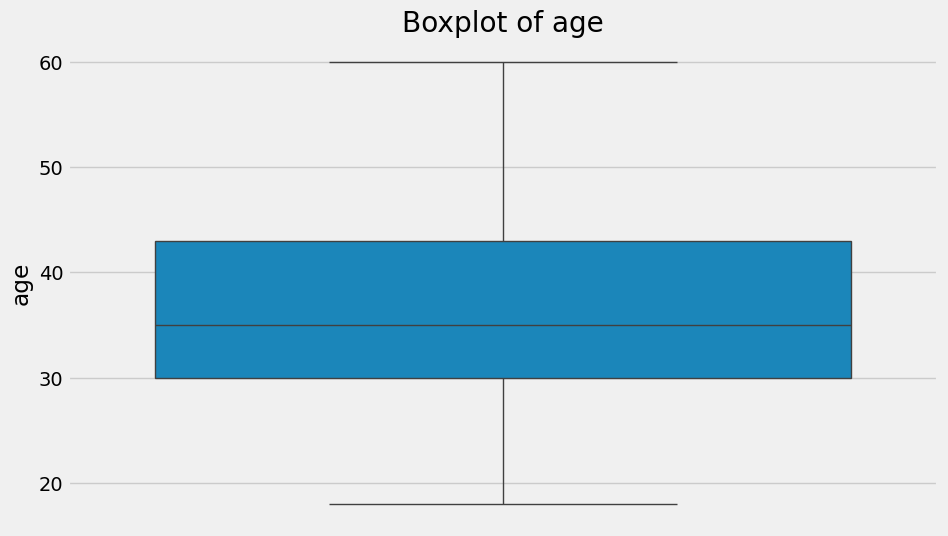

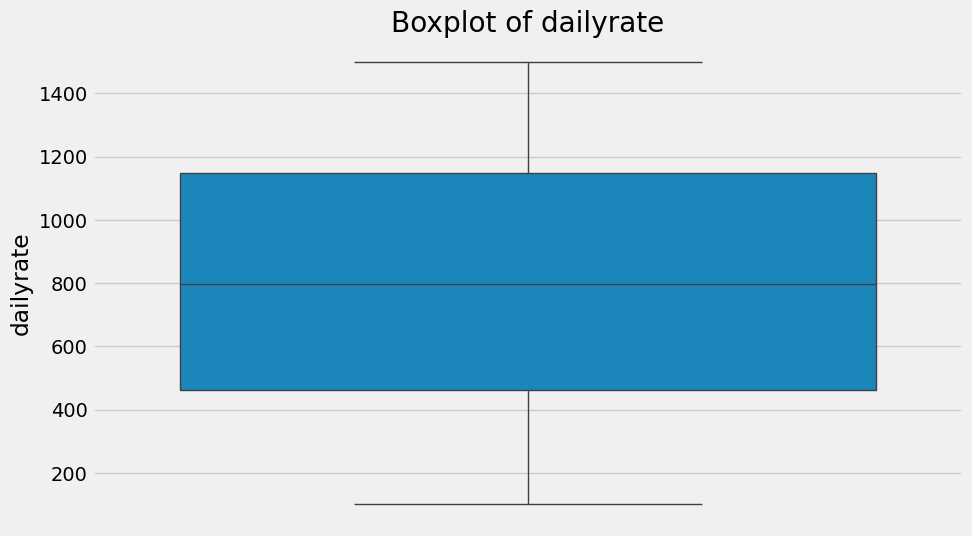

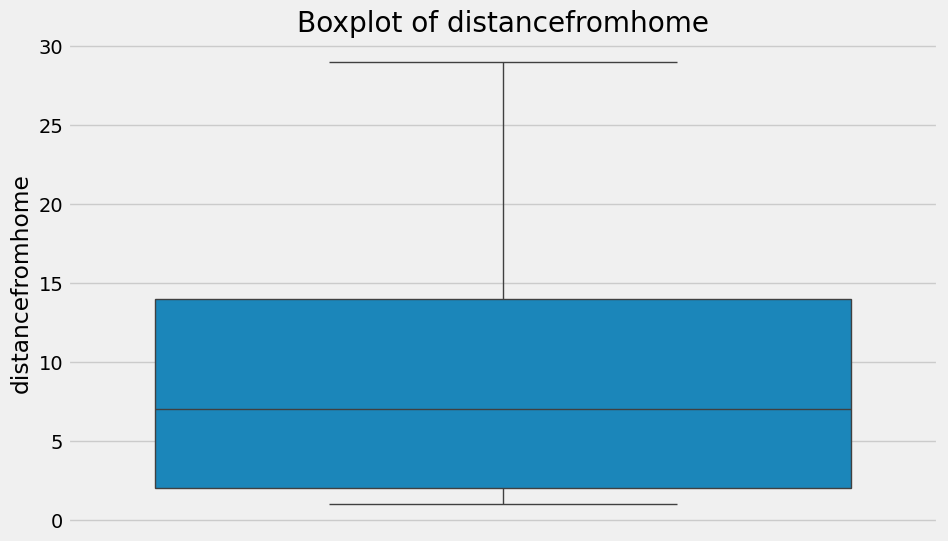

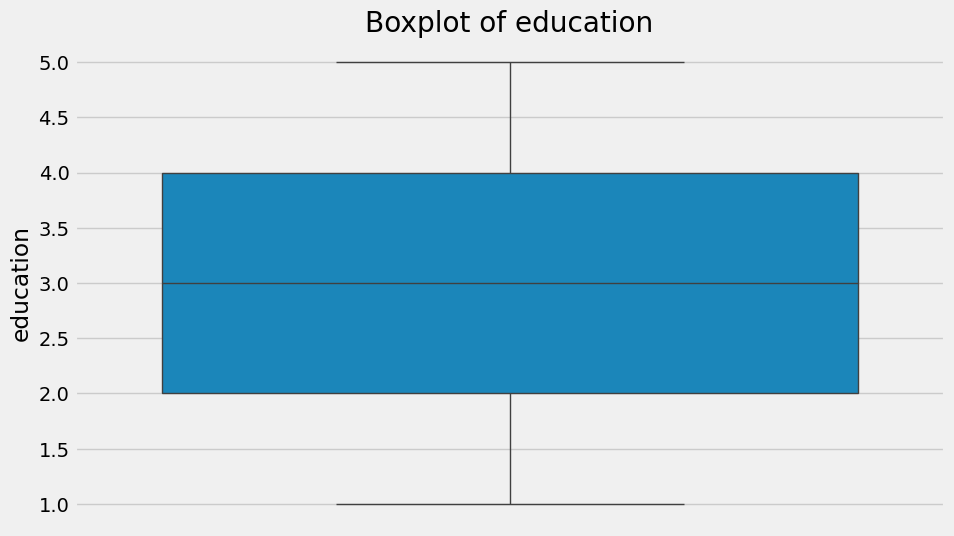

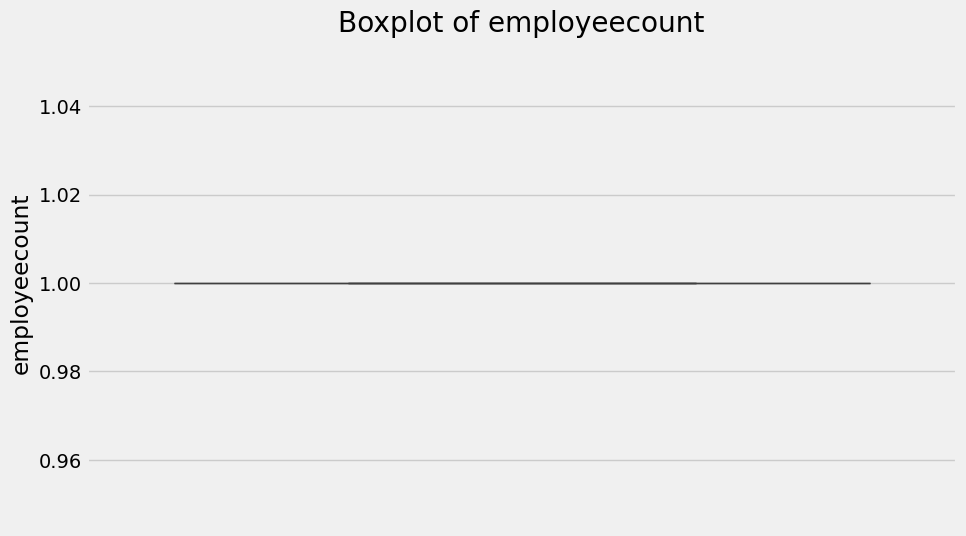

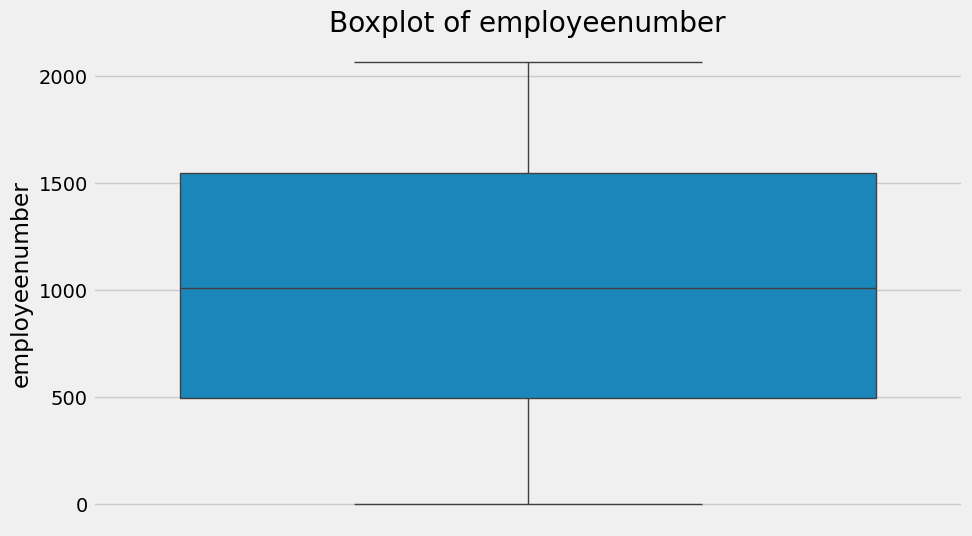

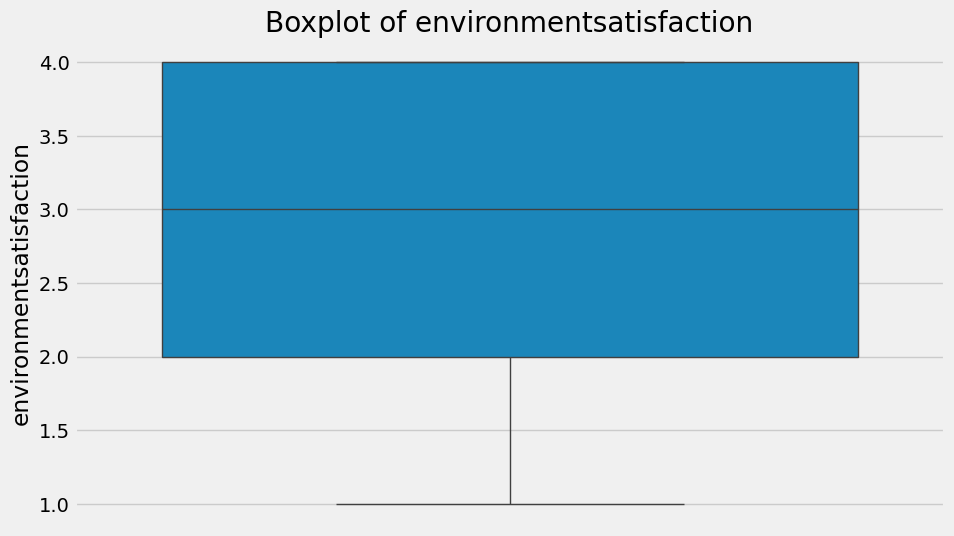

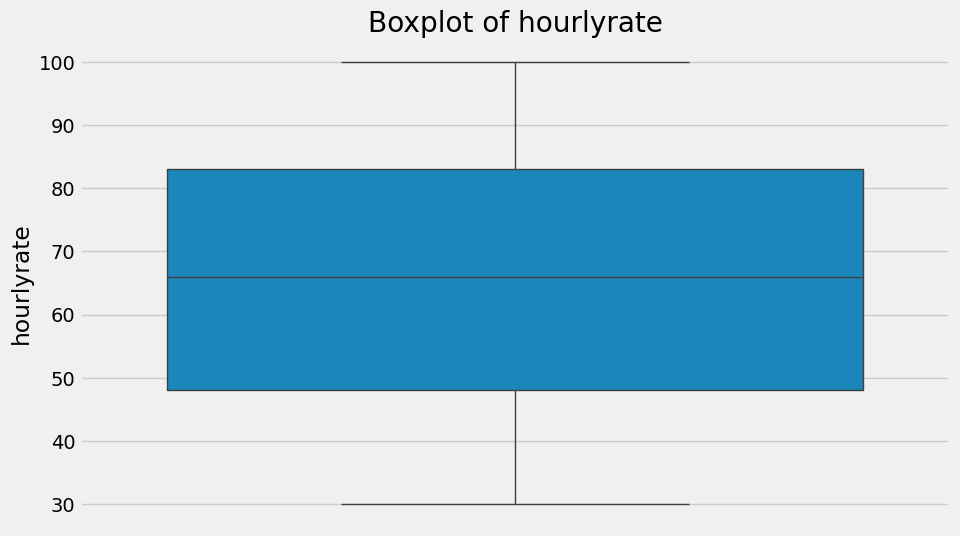

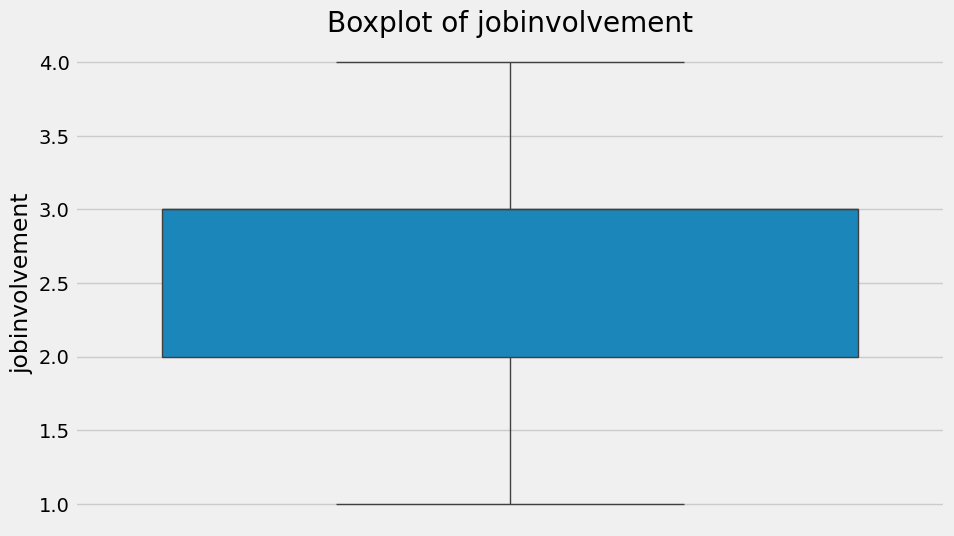

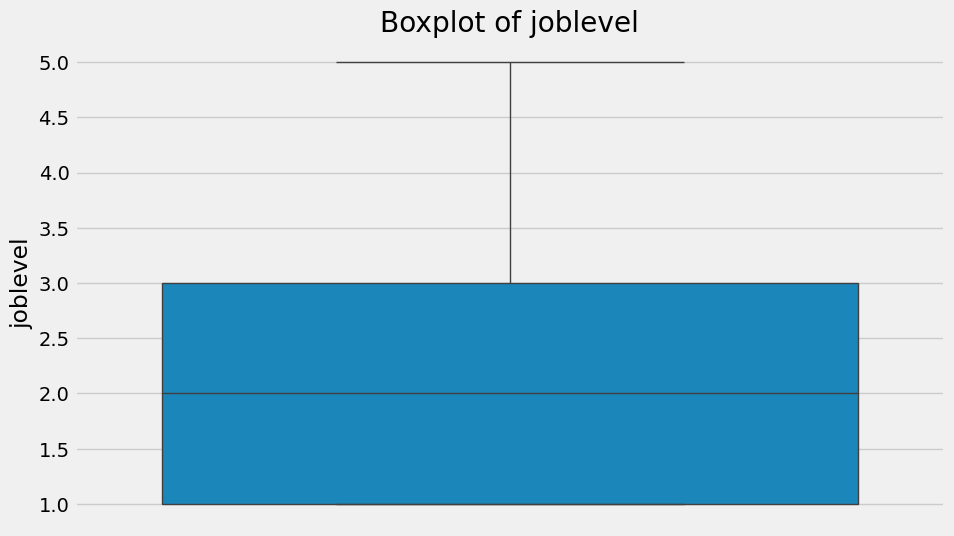

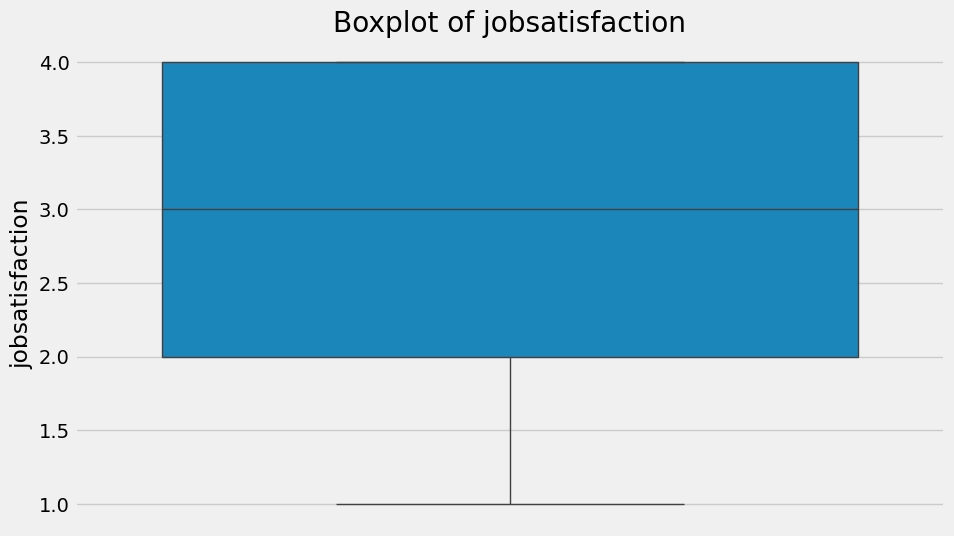

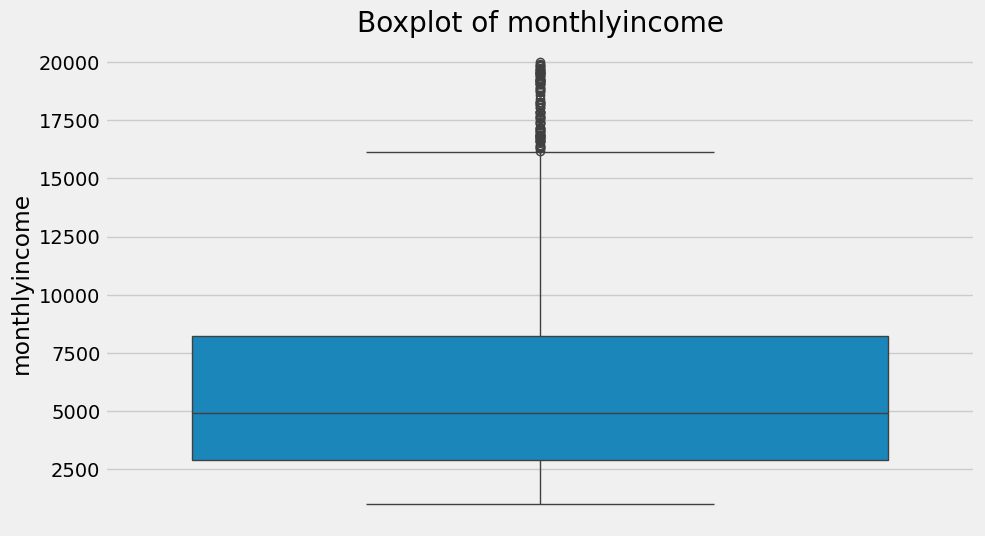

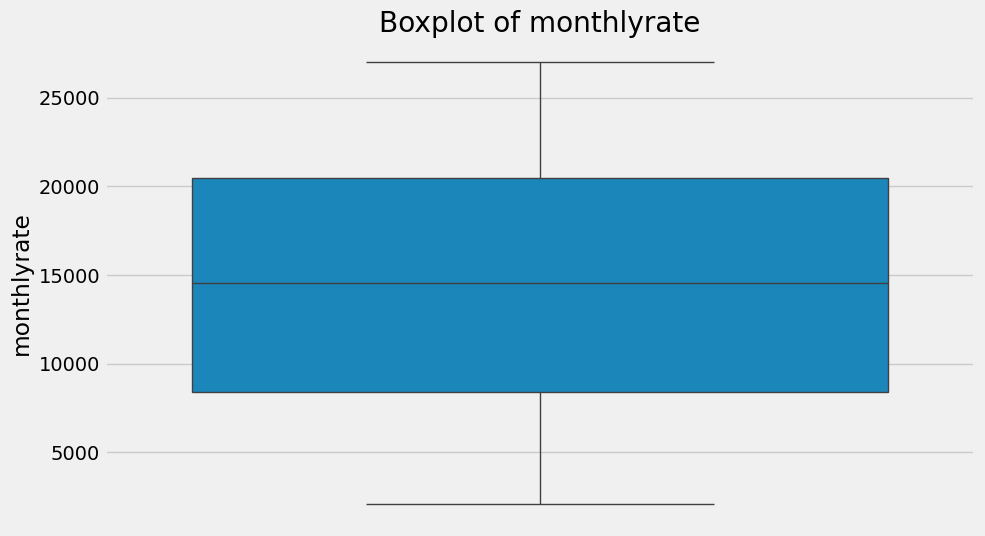

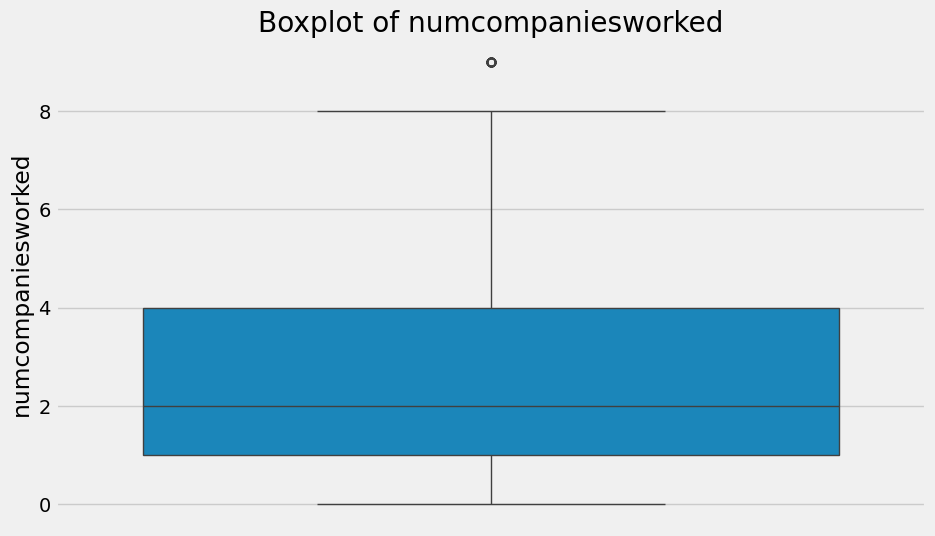

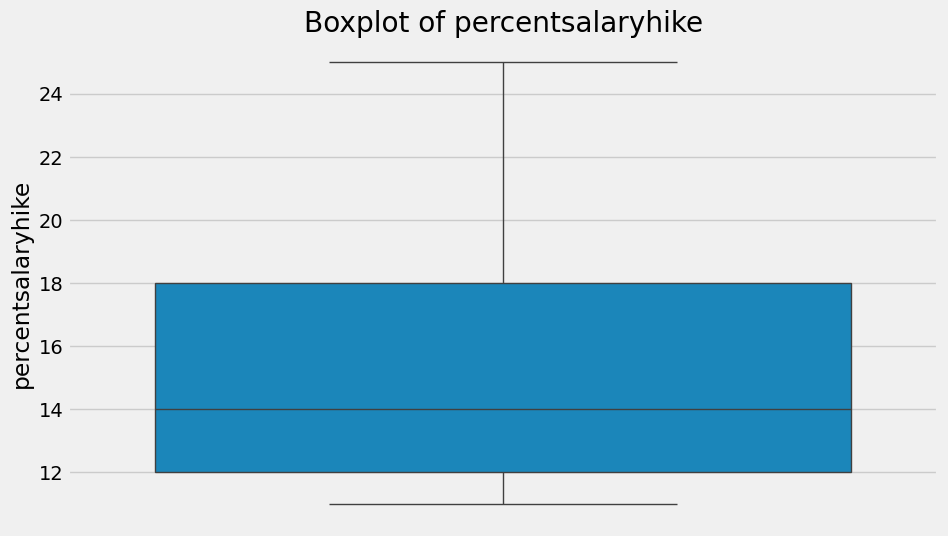

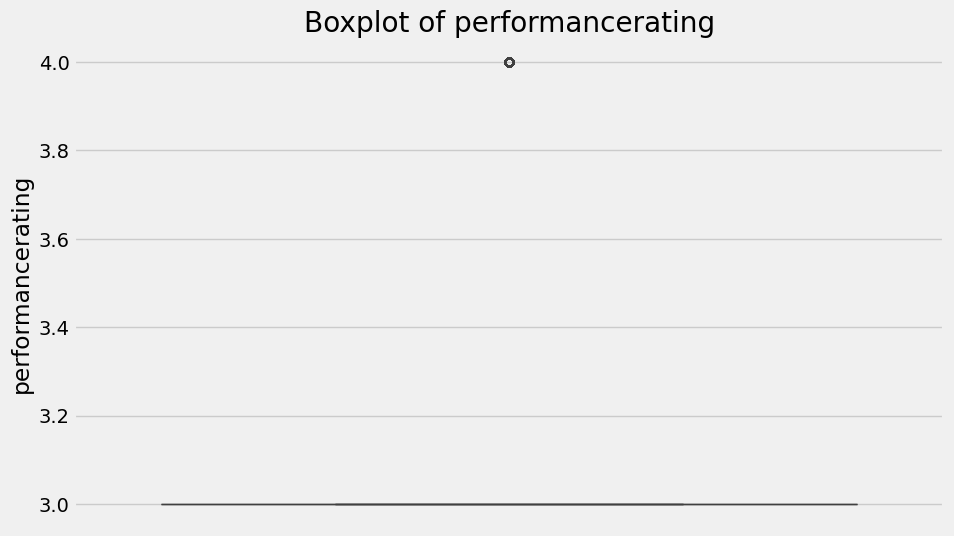

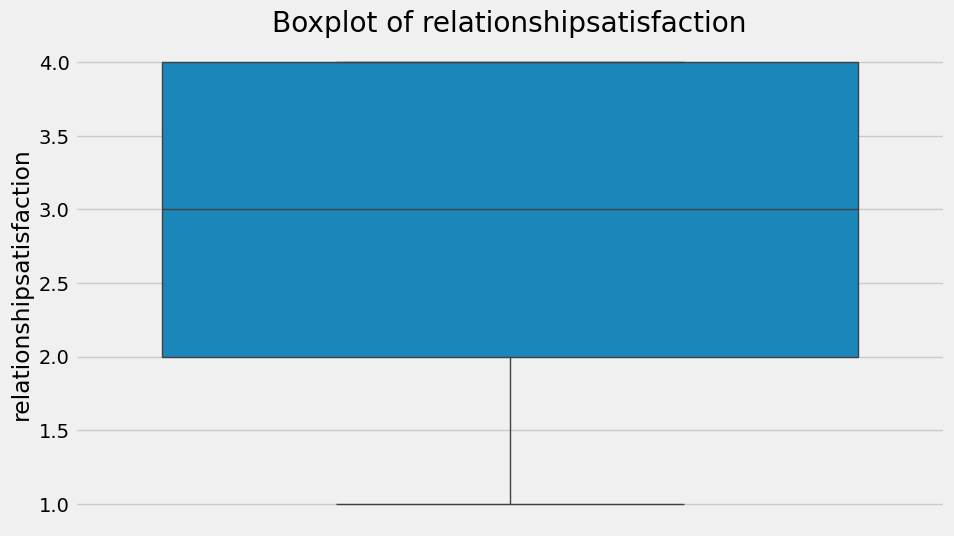

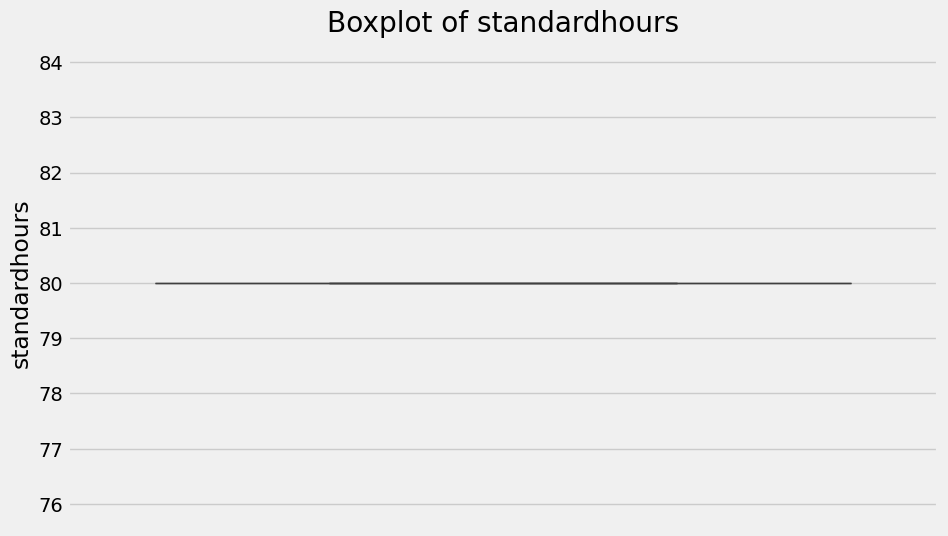

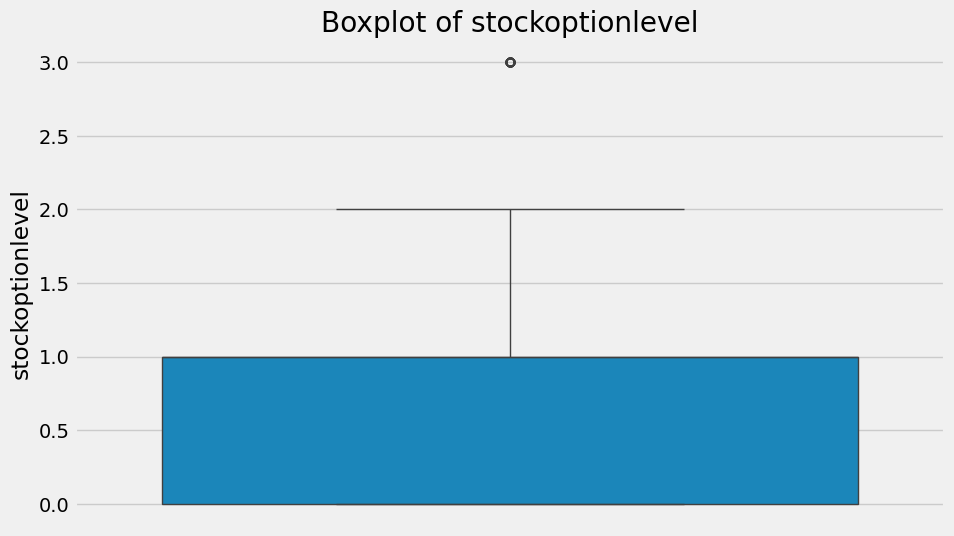

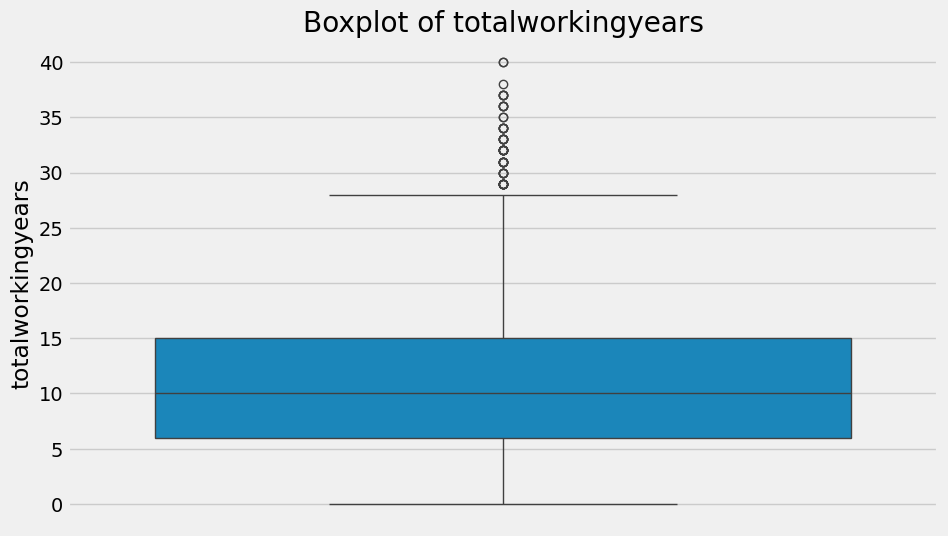

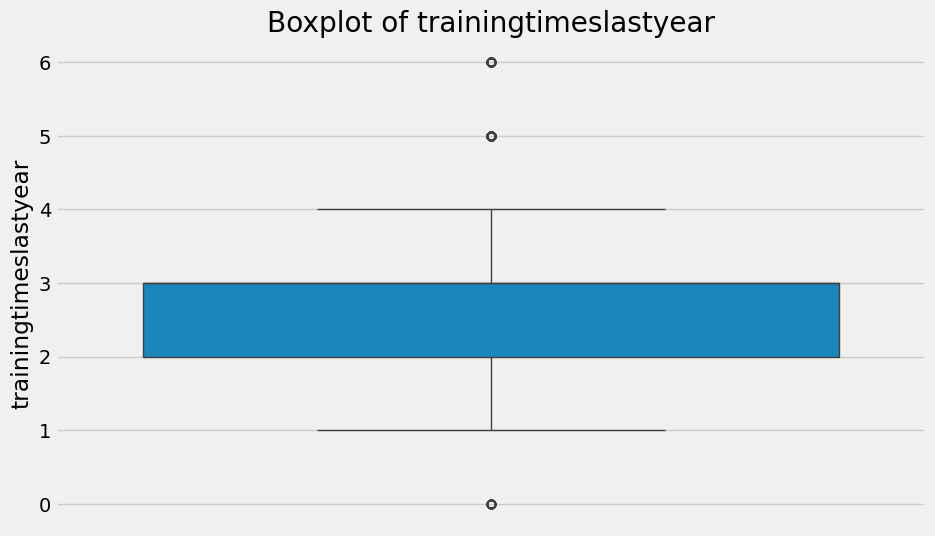

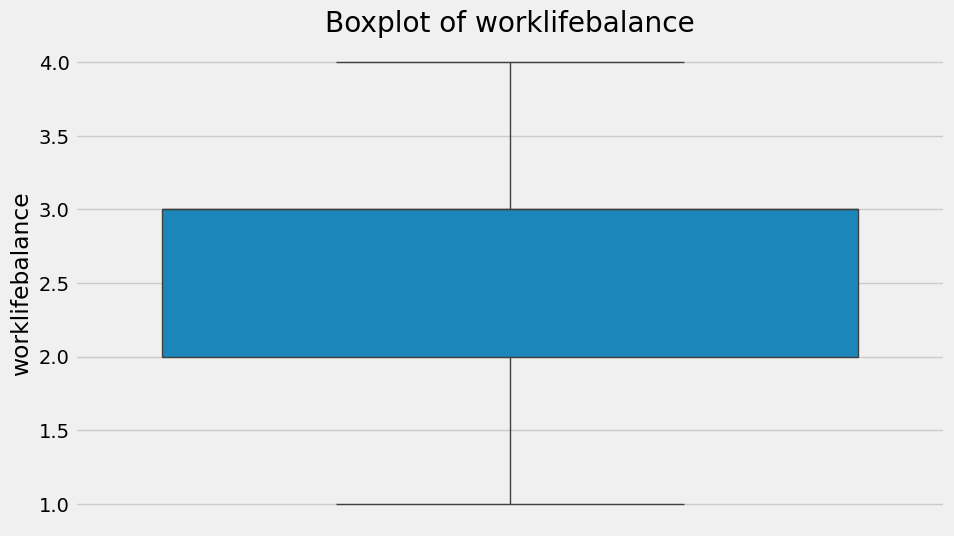

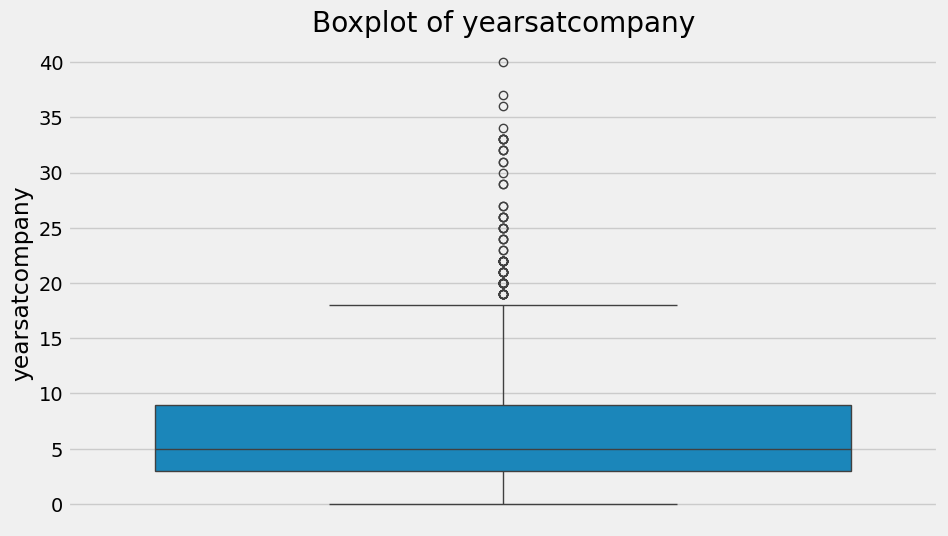

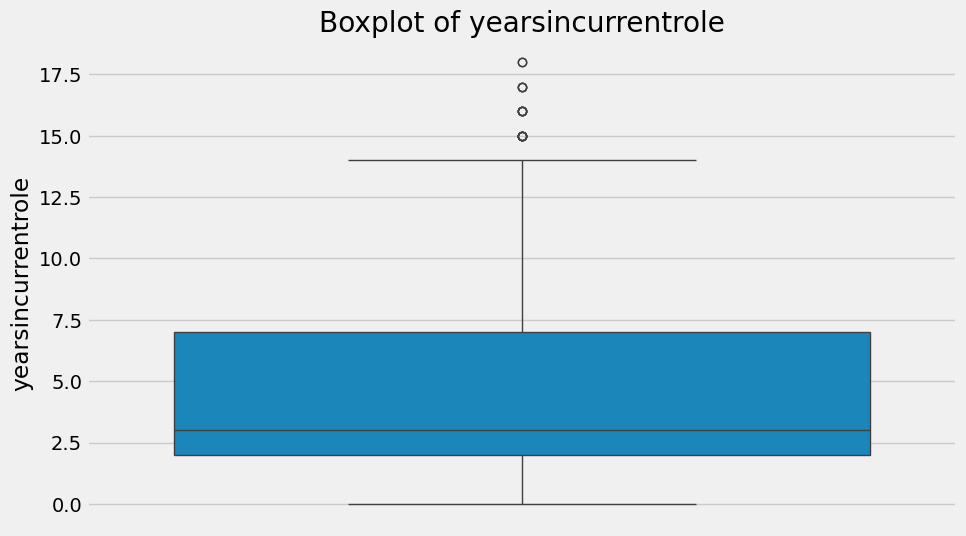

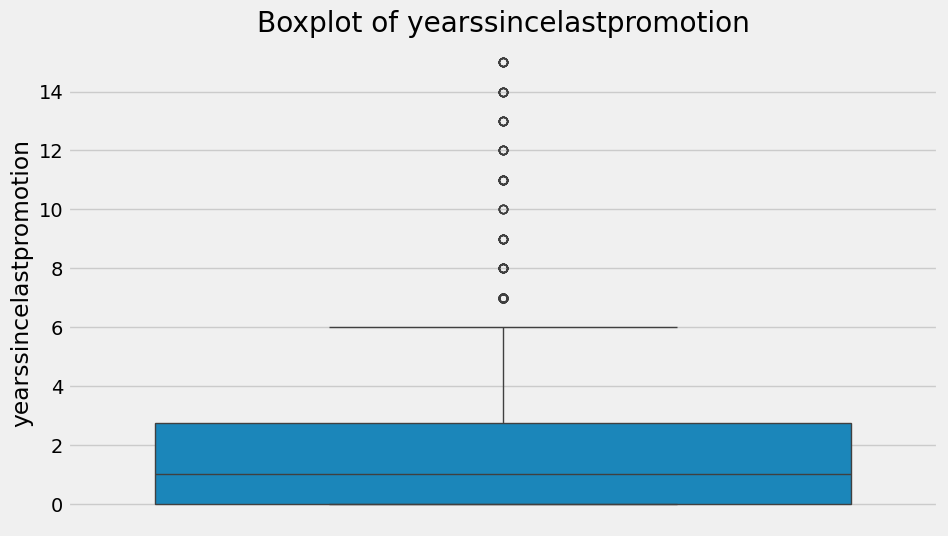

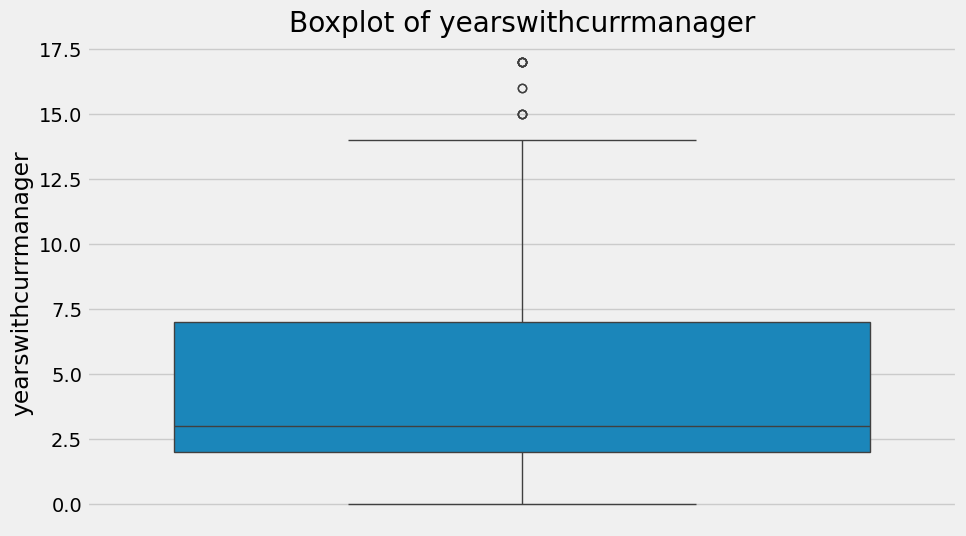

In [23]:
# Check for outliers
# YOUR CODE HERE
# Create box plots to check for outliers in numerical columns
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot of {col}')
    plt.show()


### Handling outliers

**Exercise 4: Use lower bound as 25% and upper bound as 75% to handle the outliers [0.5 Mark]**

In [25]:
# YOUR CODE HERE
# Handling outliers using IQR method
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

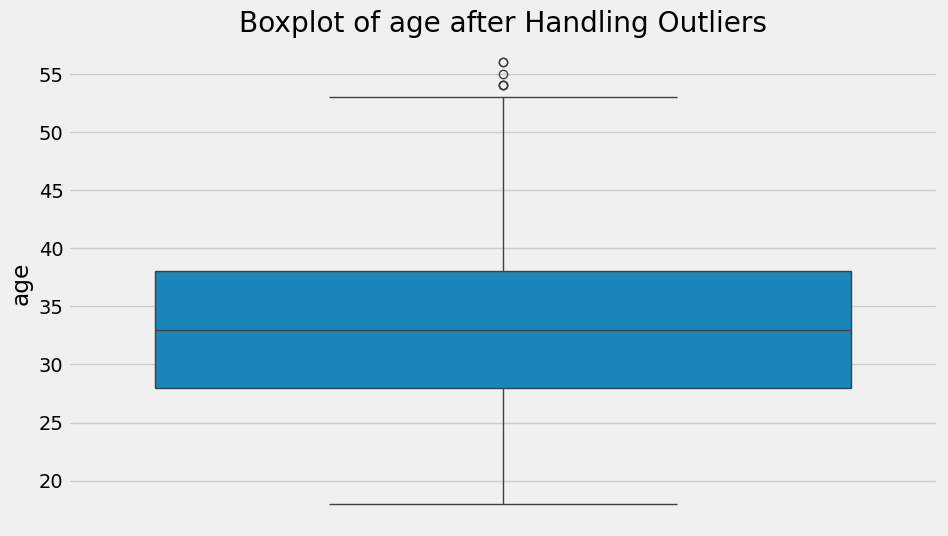

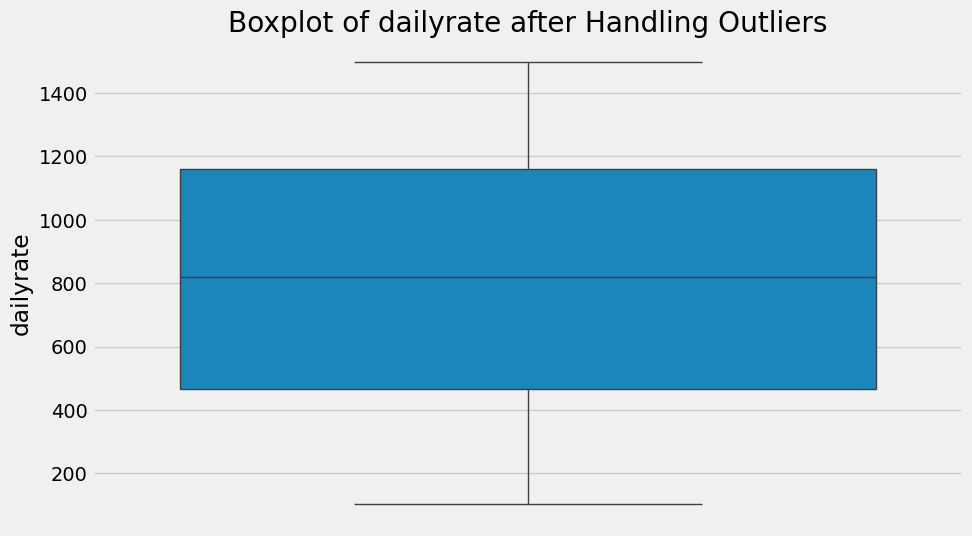

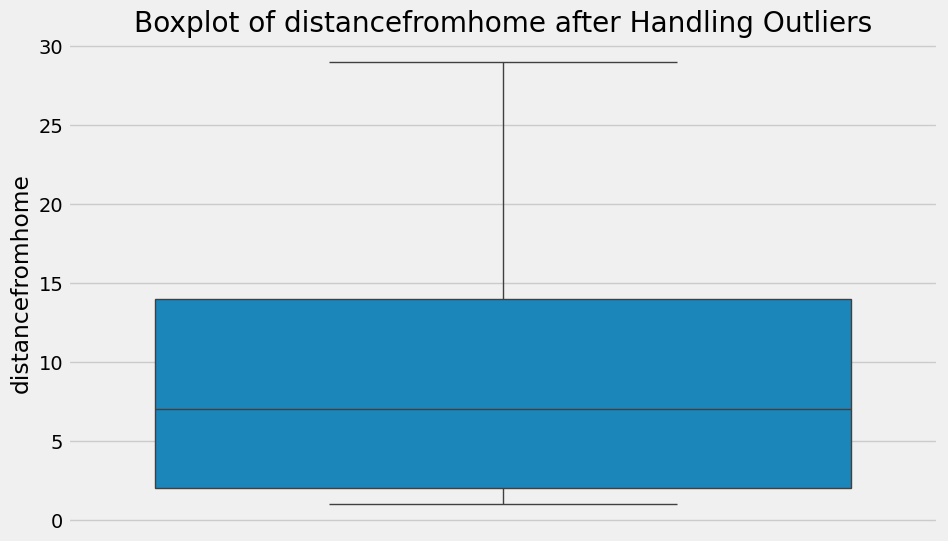

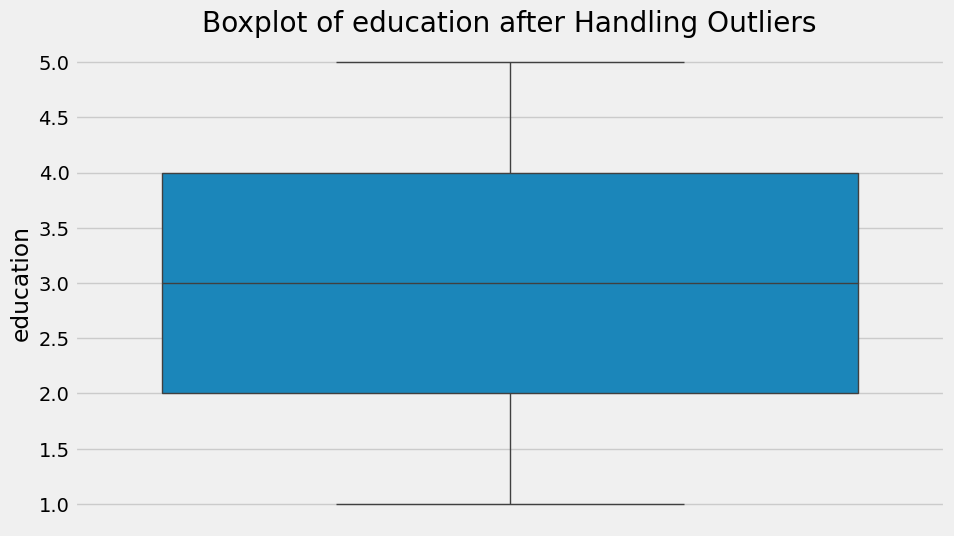

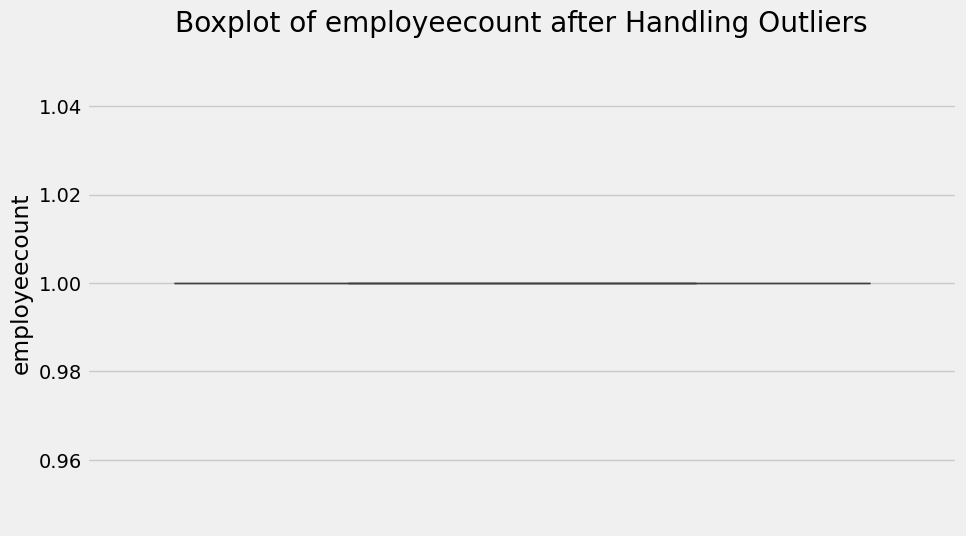

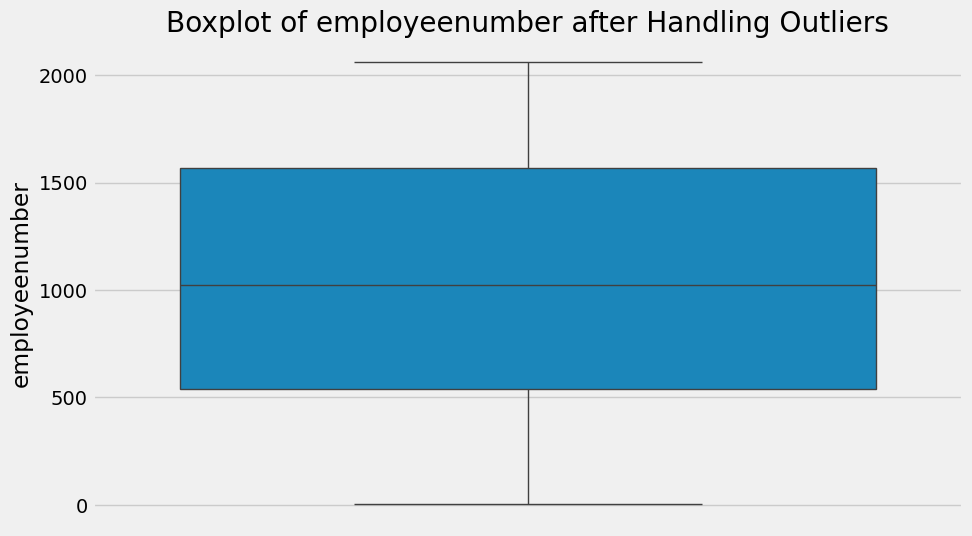

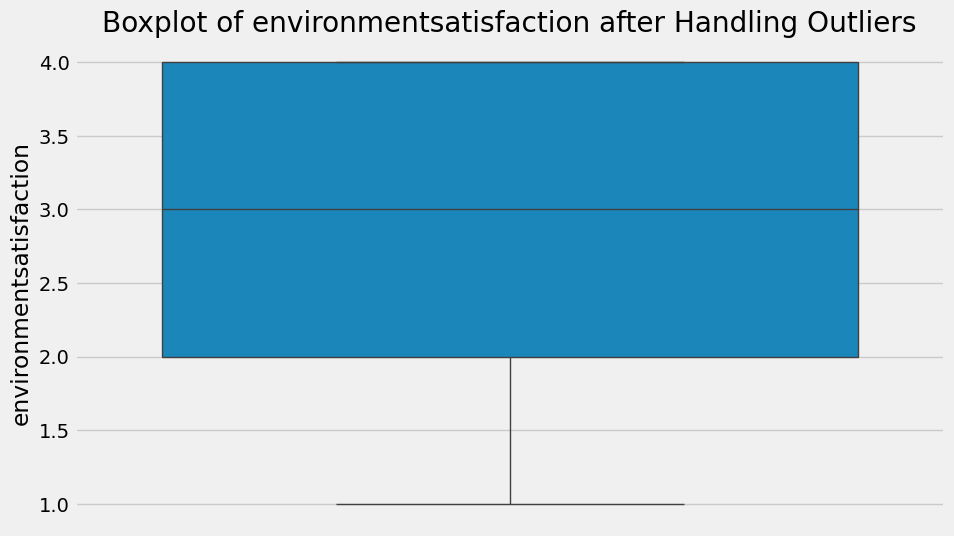

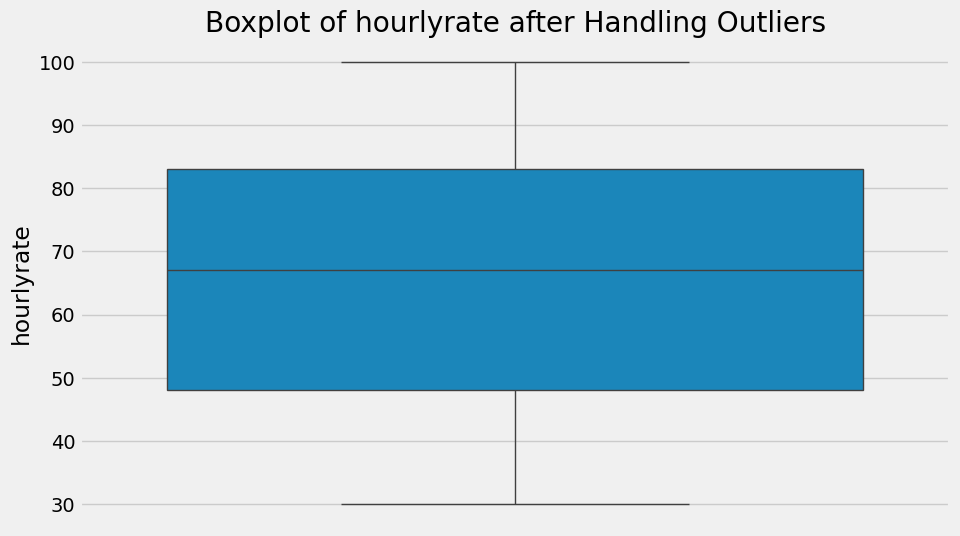

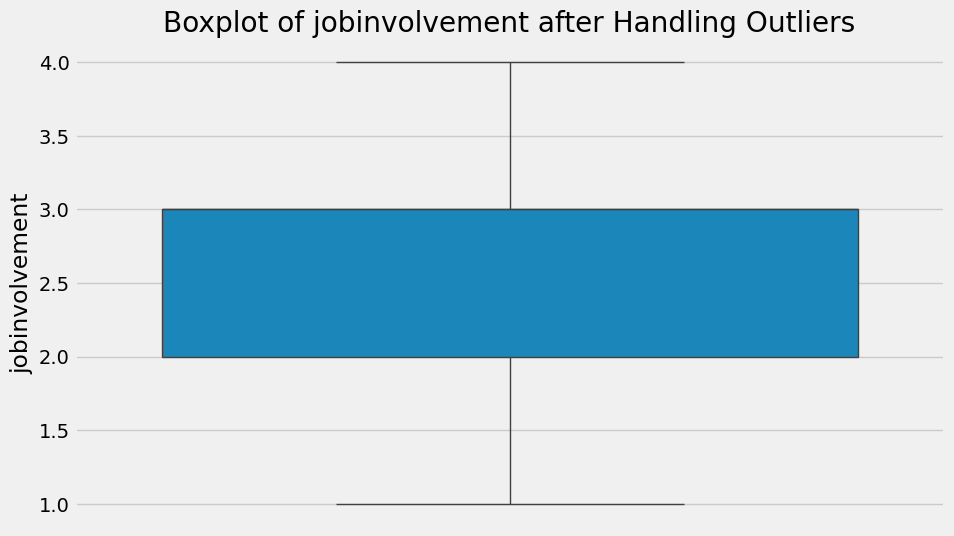

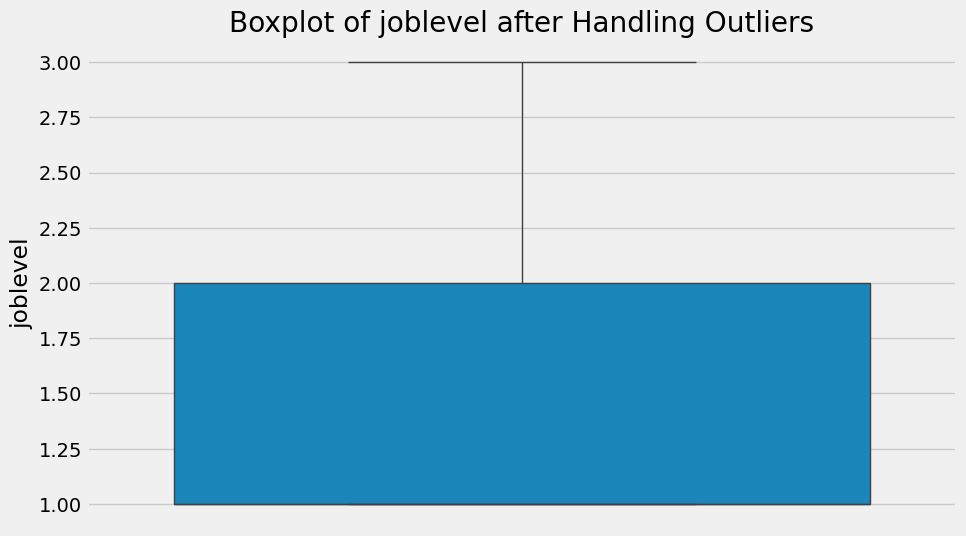

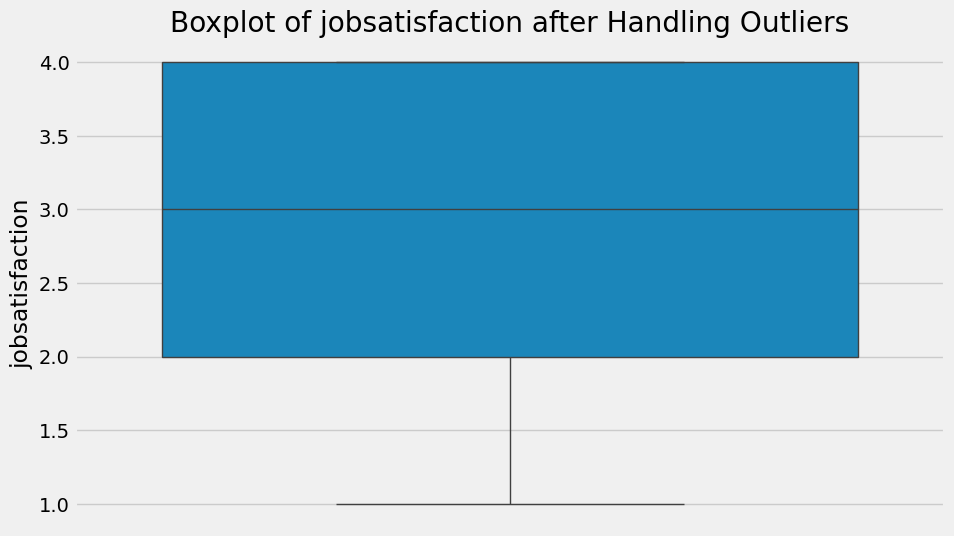

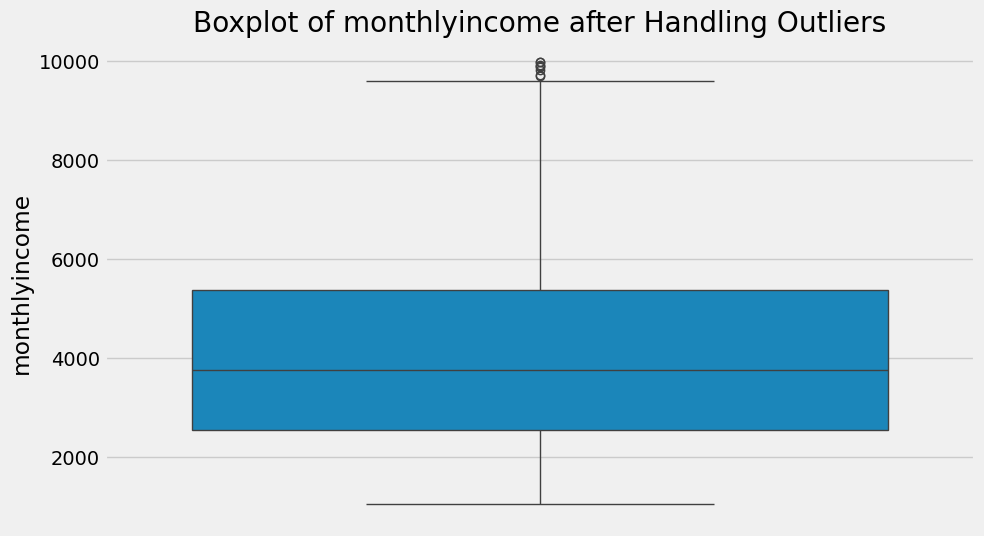

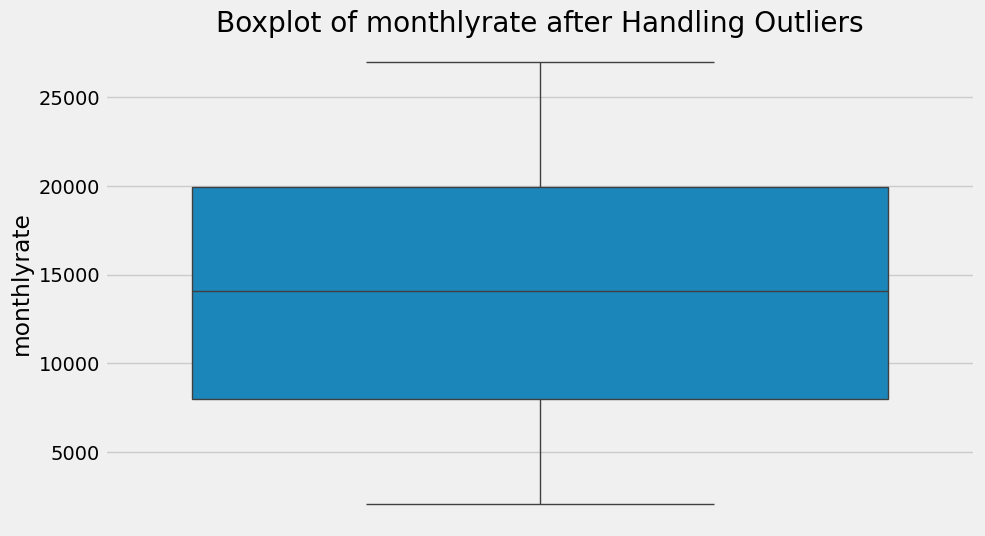

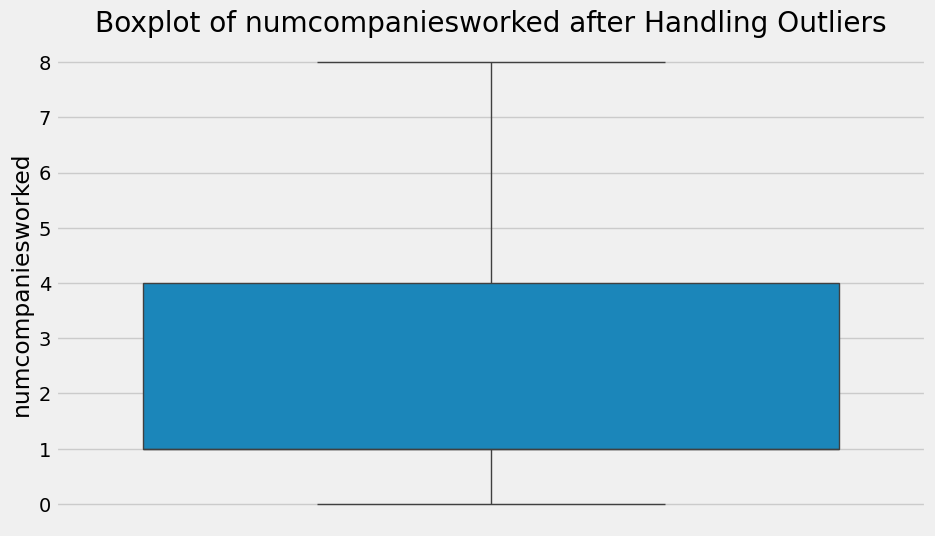

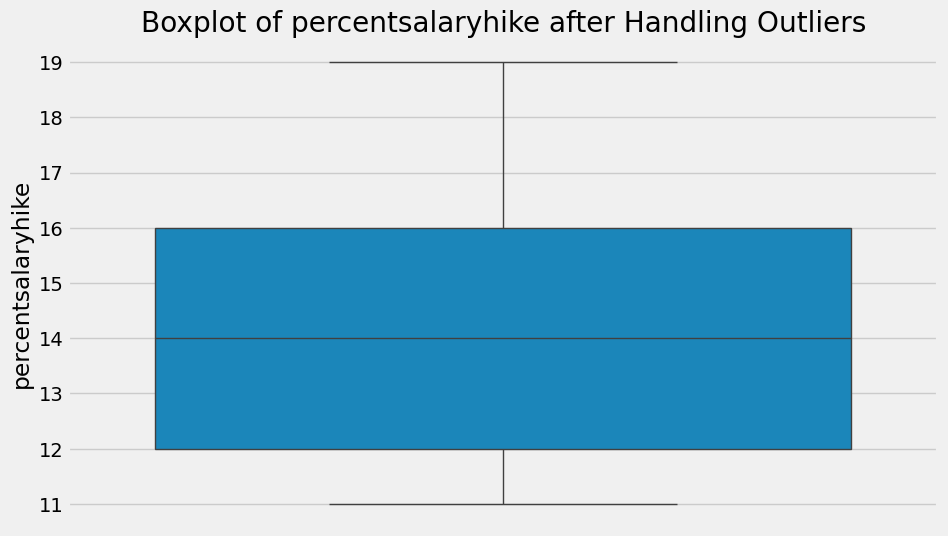

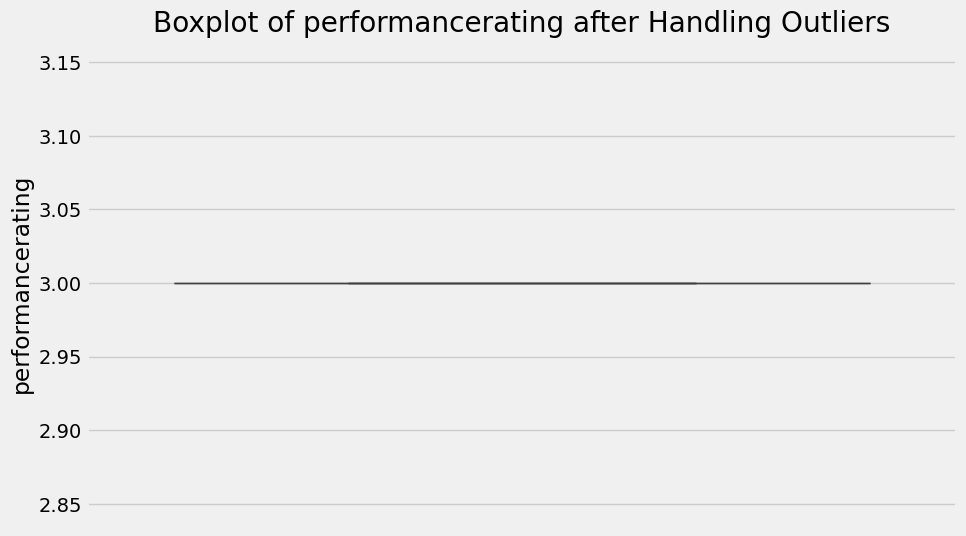

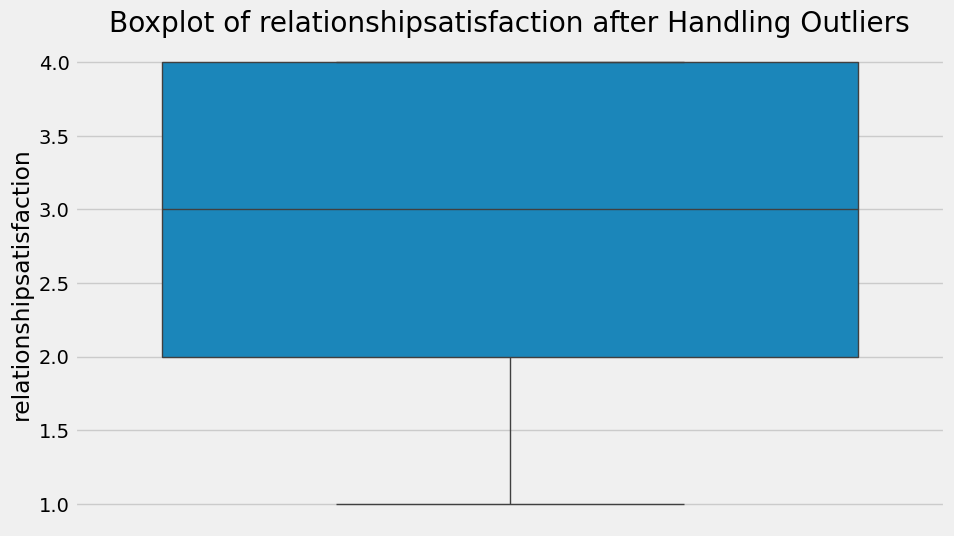

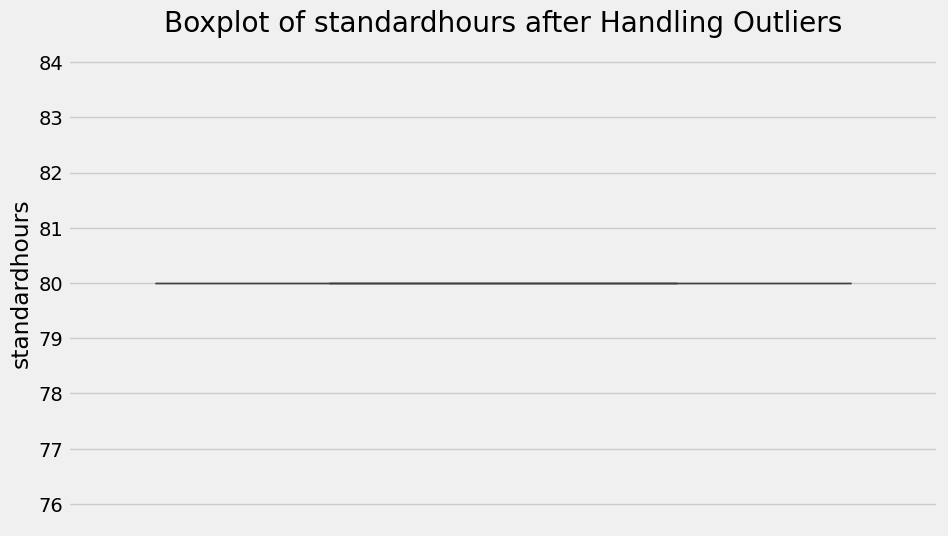

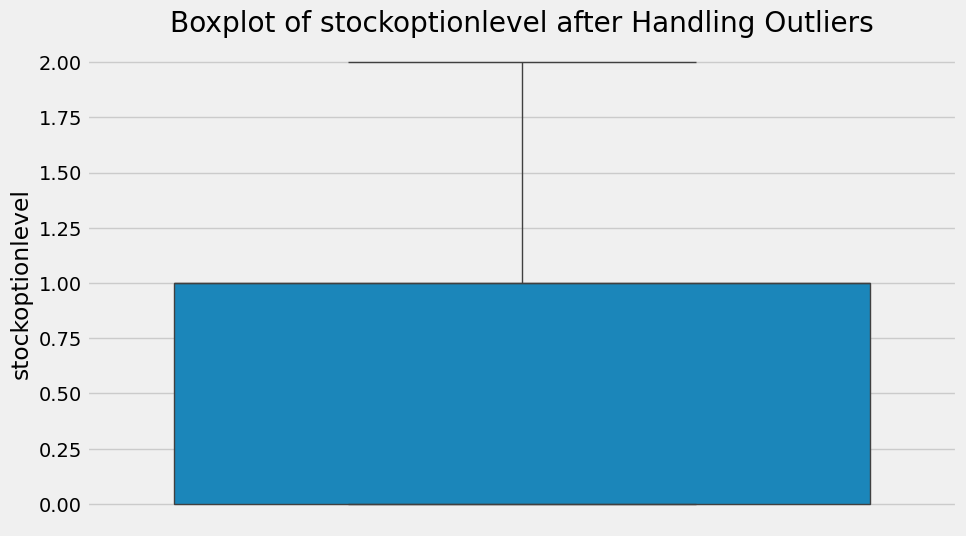

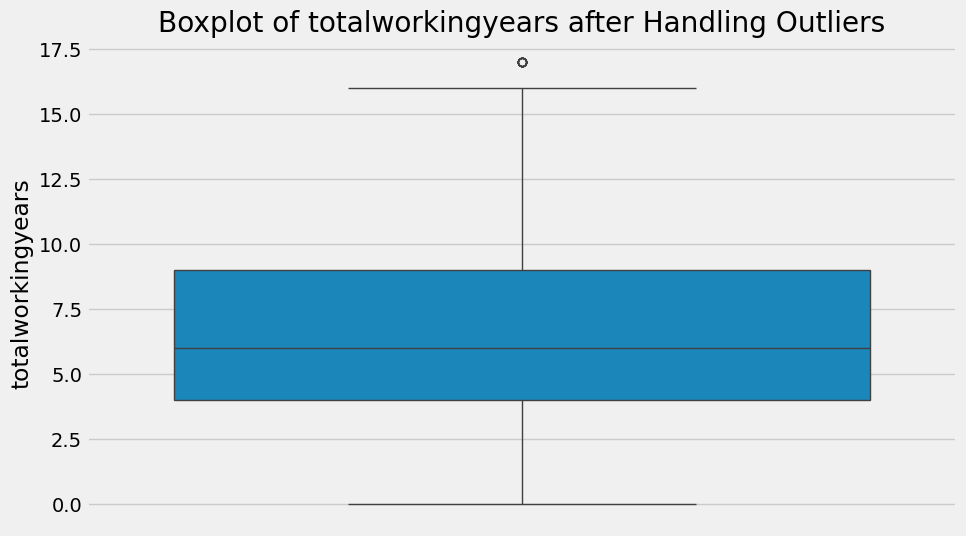

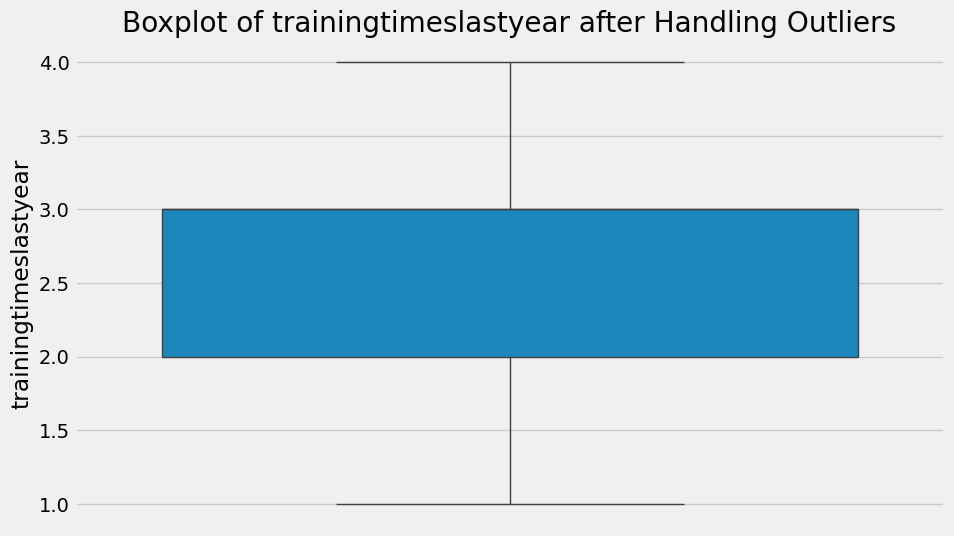

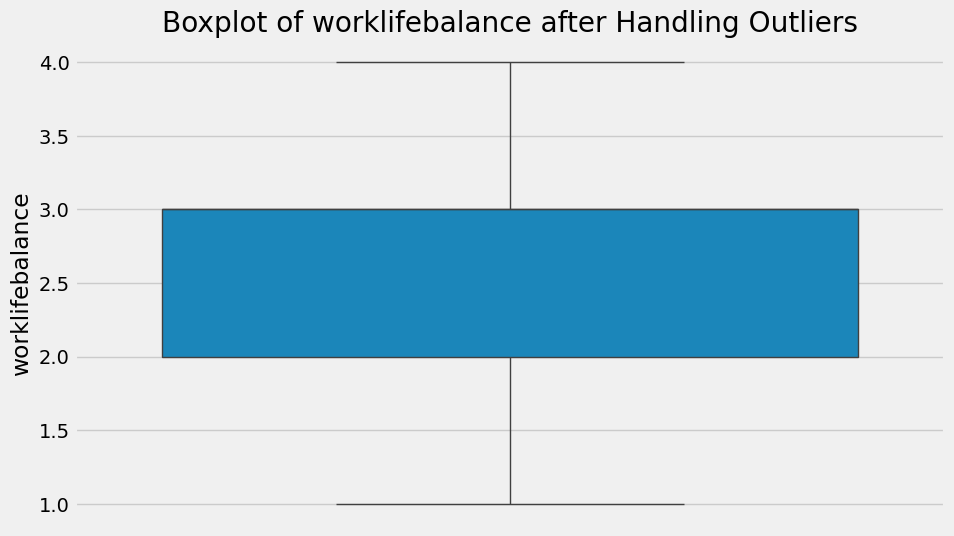

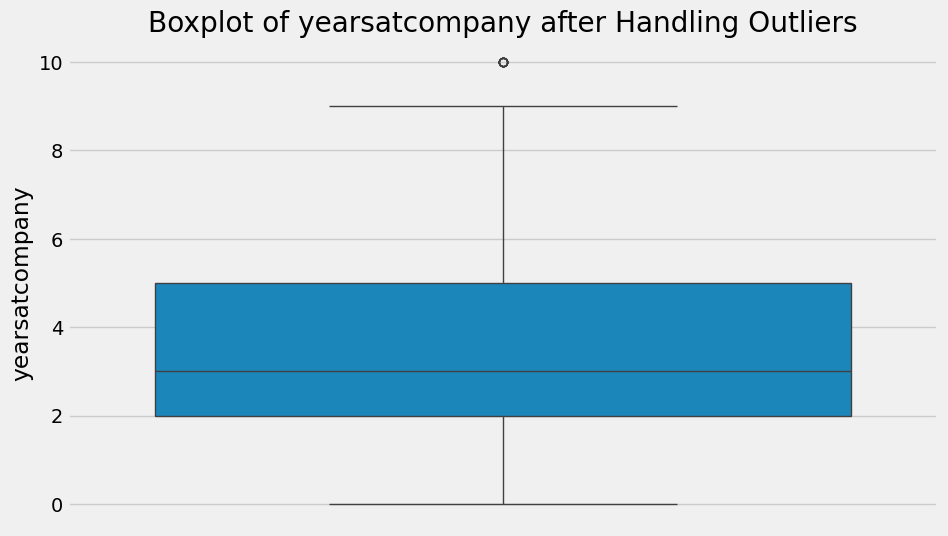

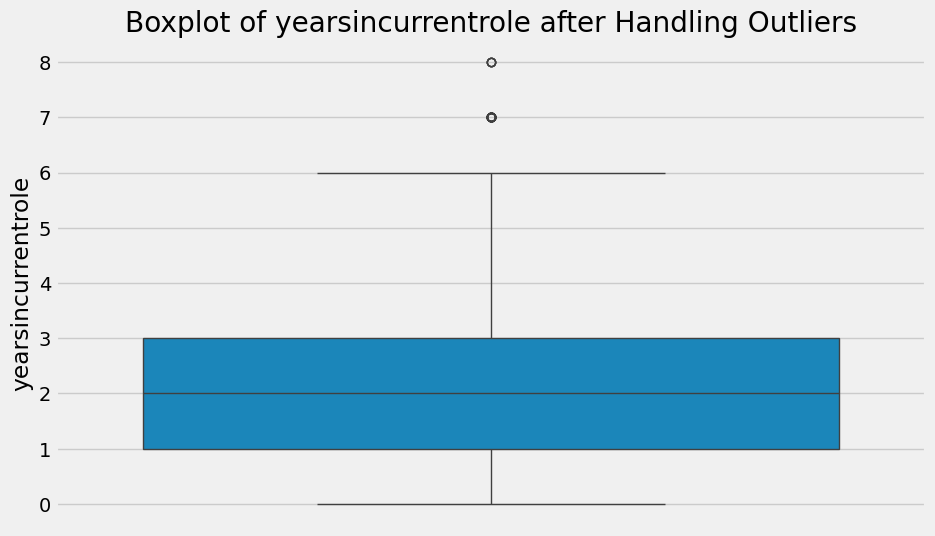

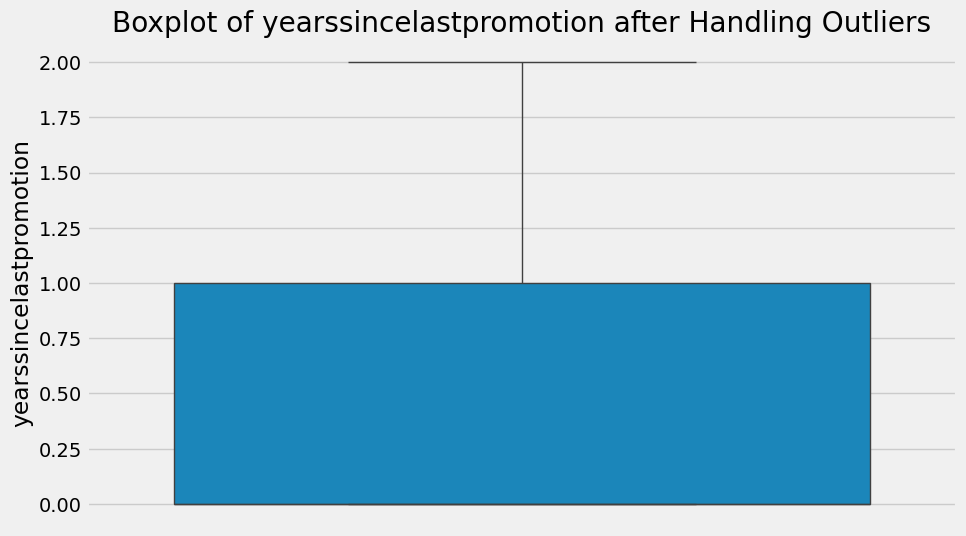

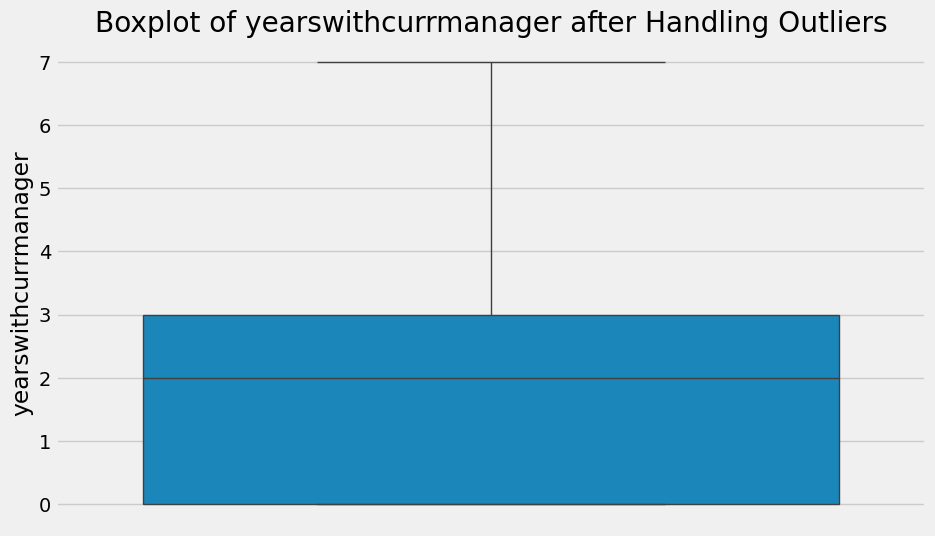

In [26]:
# Recheck for outliers
# YOUR CODE HERE
# Recheck for outliers
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot of {col} after Handling Outliers')
    plt.show()

### Target label imbalance

**Exercise 5: Check if there is an imbalance in target label [0.5 Mark]**

**Hint:** Use value_counts()

In [28]:
# Count of unique values in Attrition column
# YOUR CODE HERE
# Count of unique values in the Attrition column
attrition_counts = df['attrition'].value_counts()
print(attrition_counts)


attrition
No     320
Yes     86
Name: count, dtype: int64


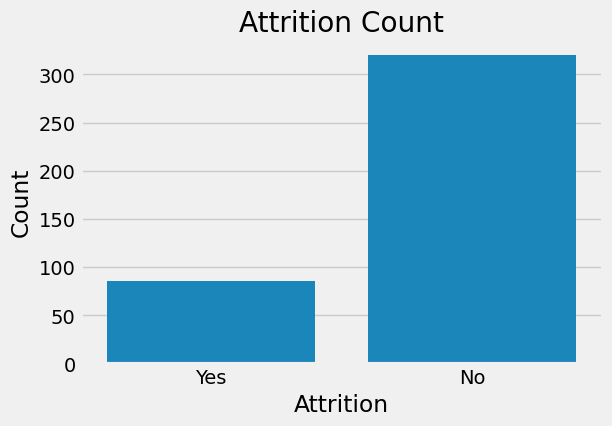

In [29]:
# Plot barplot to visualize balance/imbalance
# YOUR CODE HERE
# Plot barplot to visualize balance/imbalance
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='attrition')
plt.title('Attrition Count')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()


If there is any imbalance in the dataset then a few techniques can be utilised (optional):
1. SMOTE
2. Cross Validation
3. Regularizing the model's parameters

###Plot pairplot

**Exercise 6: Visualize the relationships between the predictor variables and the target variable using a pairplot [0.5 Mark]**

**Hint:** Use sns.pairplot

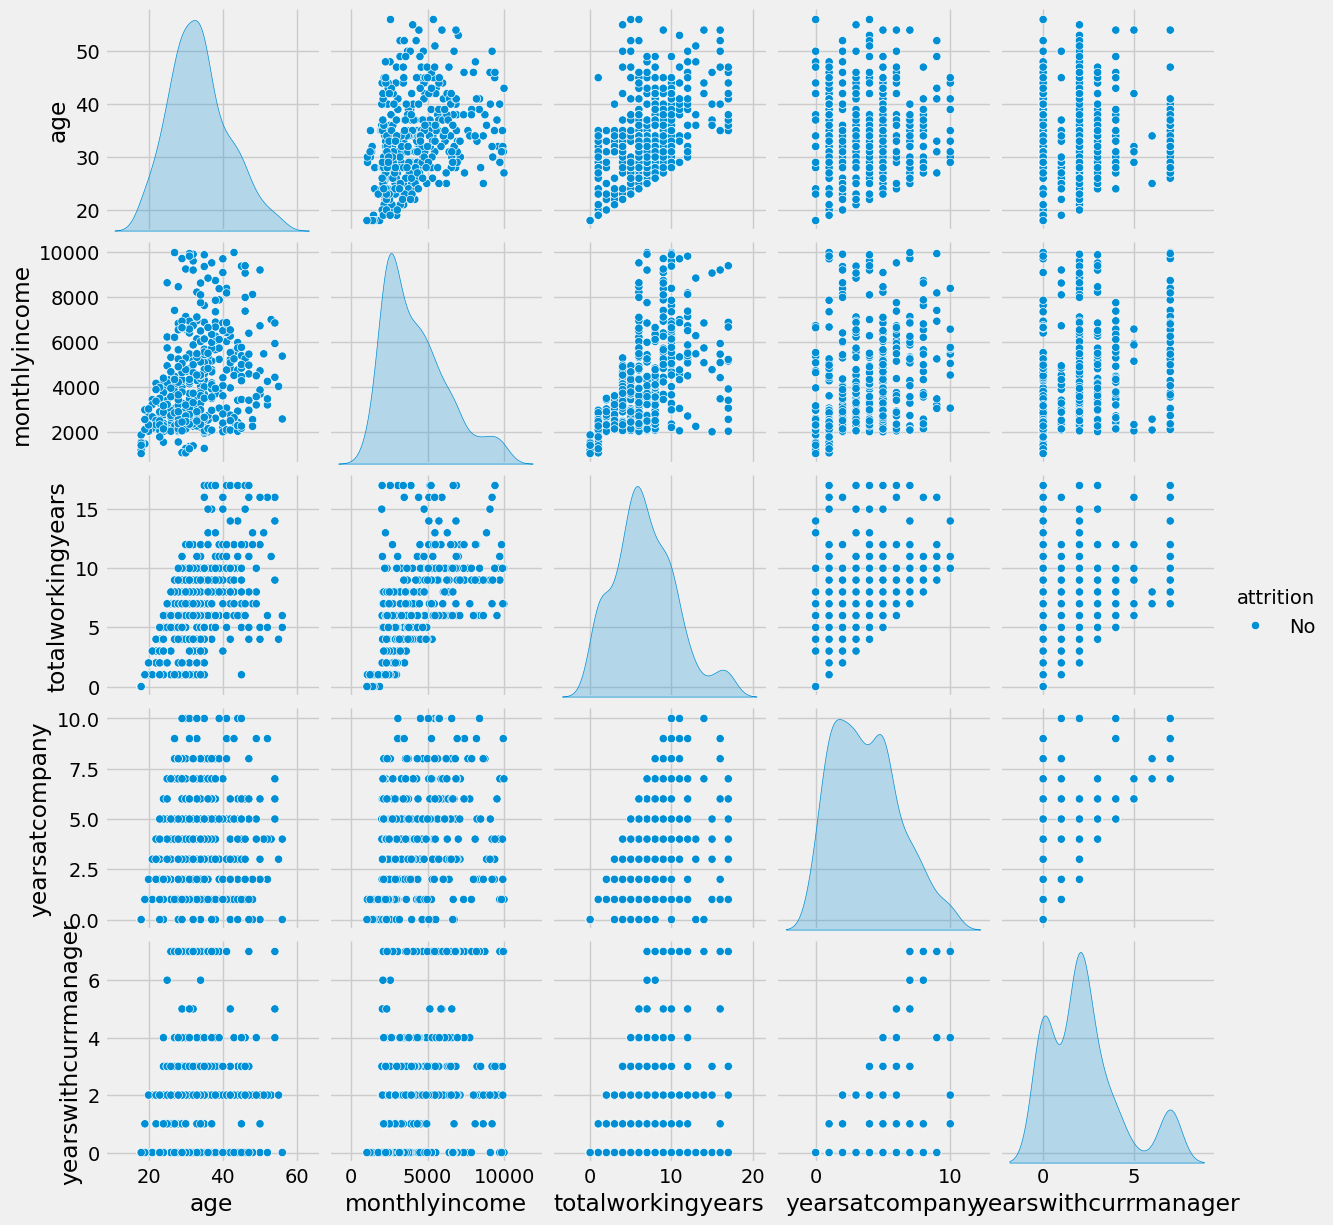

In [36]:
# Visualize a pairplot with relevant features
# YOUR CODE HERE
import seaborn as sns

# Select a subset of relevant features for the pairplot
relevant_features = ['age', 'monthlyincome', 'totalworkingyears', 'yearsatcompany', 'yearswithcurrmanager', 'attrition']

# Convert the target variable 'attrition' back to categorical for visualization
df['attrition'] = df['attrition'].apply(lambda x: 'Yes' if x == 1 else 'No')

# Visualize the pairplot with relevant features
sns.pairplot(df[relevant_features], hue='attrition')
plt.show()




### Explore Correlation

- Plotting the Heatmap

**Exercise 7: Visualize the correlation among IBM employee attrition numerical features using a heatmap [0.5 Mark]**

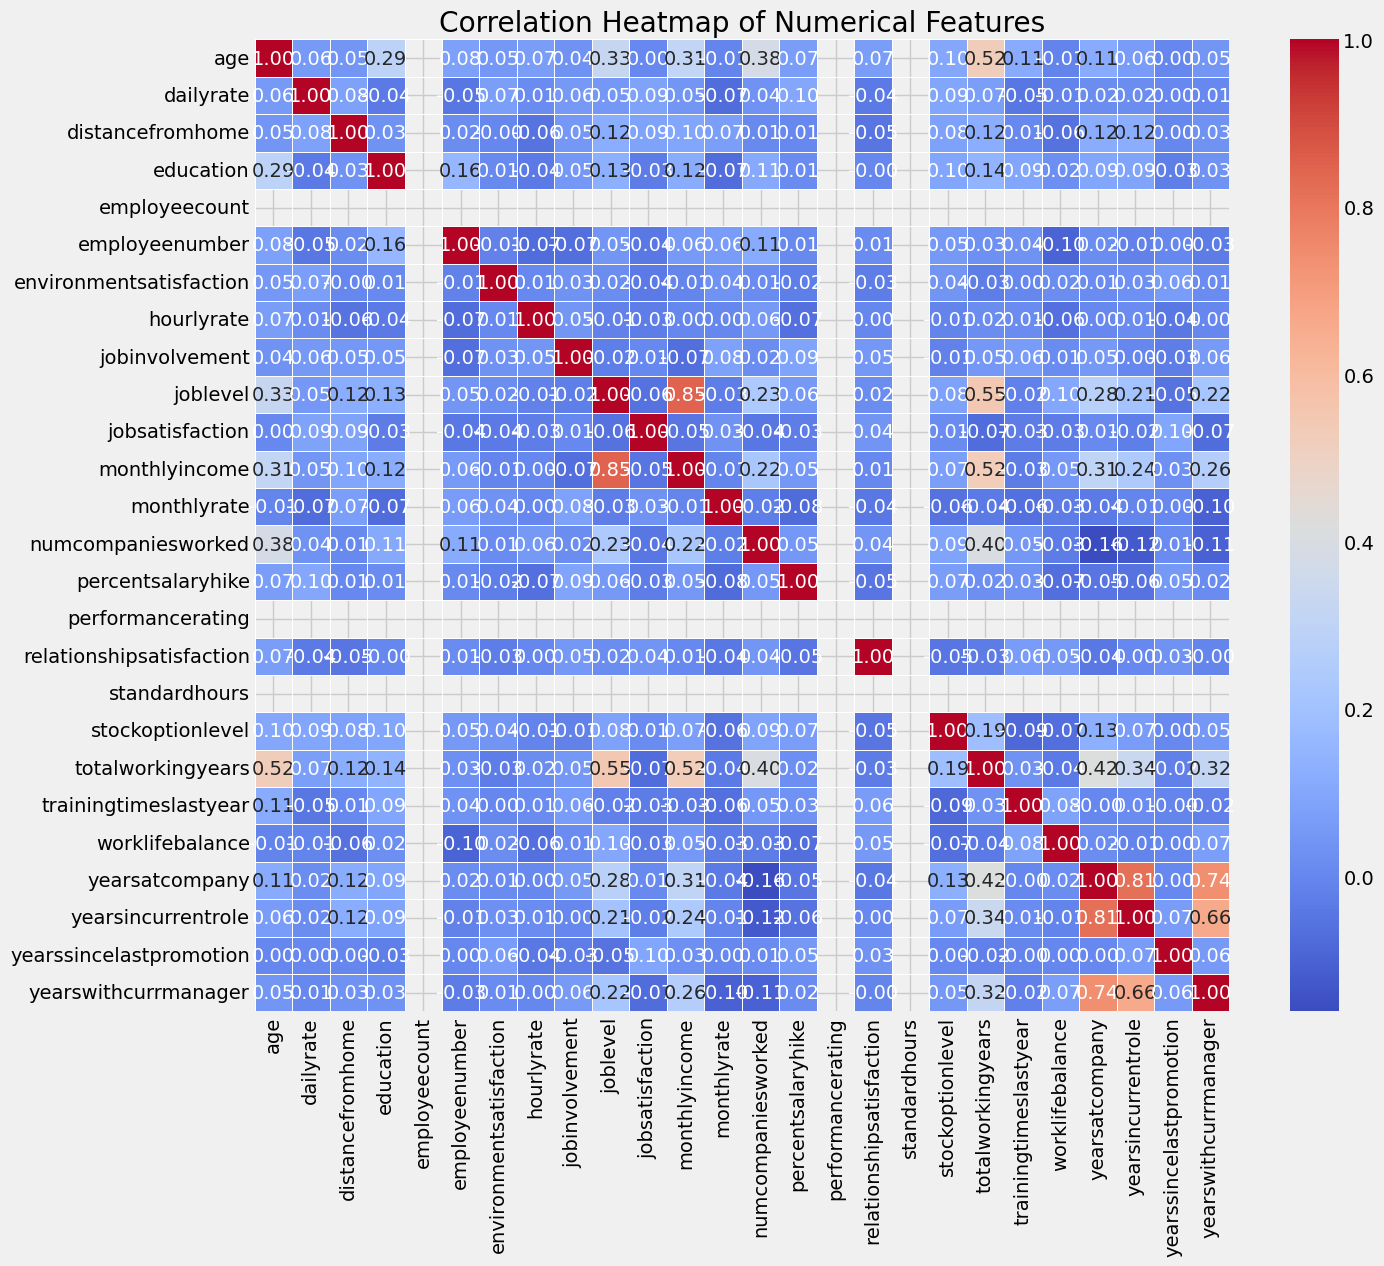

In [37]:
# Visualize heatmap
# YOUR CODE HERE
# Calculate the correlation matrix for numerical features
correlation_matrix = df[numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


Comment on the observations made with the pairplot and heatmap

Observations from the Pairplot:

1.Separation: Some features like monthlyincome and totalworkingyears show noticeable separation between employees who stayed (No) and those who left (Yes).

2.Overlaps: Features like age and yearswithcurrmanager show overlapping distributions for both classes, indicating they may not strongly differentiate between the two groups.

Observations from the Heatmap:

1.Strong Positive Correlations:
-yearsatcompany, yearswithcurrmanager, and yearsincurrentrole are strongly correlated, indicating potential multicollinearity.
-totalworkingyears and joblevel have a strong positive correlation with monthlyincome.

2.Moderate Correlations:
-age correlates moderately with totalworkingyears.
-numcompaniesworked moderately correlates with totalworkingyears.

3.Weak or No Correlations:
-Features like dailyrate, hourlyrate, and percent salary hike show weak or no significant correlations with other features.

These observations suggest focusing on strongly correlated features and addressing potential multicollinearity when building predictive models for employee attrition.

### Preparing the test feature space
* Remove outliers if any
* Handle the categorical feature if required
* Other processing steps can also be followed.

In [41]:
# YOUR CODE HERE
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load the dataset (already done previously)
df = pd.read_csv('hr_employee_attrition_train.csv')

# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(numerical_cols)
print(categorical_cols)

# Preserve 'attrition' column separately before handling categorical features
attrition = df['attrition']

# Step 1: Removing Outliers using IQR method
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Step 2: Handling Categorical Features using one-hot encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Restore the 'attrition' column
df['attrition'] = attrition

# Step 3: Other Preprocessing Steps (handling missing values, scaling, etc.)
df = df.dropna()  # Drop any remaining missing values

# Split the dataset into features and target variable
X = df.drop('attrition', axis=1)
y = df['attrition']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Print shapes of the prepared data
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")



['age', 'dailyrate', 'distancefromhome', 'education', 'employeecount', 'employeenumber', 'environmentsatisfaction', 'hourlyrate', 'jobinvolvement', 'joblevel', 'jobsatisfaction', 'monthlyincome', 'monthlyrate', 'numcompaniesworked', 'percentsalaryhike', 'performancerating', 'relationshipsatisfaction', 'standardhours', 'stockoptionlevel', 'totalworkingyears', 'trainingtimeslastyear', 'worklifebalance', 'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion', 'yearswithcurrmanager']
['businesstravel', 'department', 'educationfield', 'gender', 'jobrole', 'maritalstatus', 'over18', 'overtime', 'attrition']
X_train shape: (363, 48)
X_test shape: (156, 48)
y_train shape: (363,)
y_test shape: (156,)


Optional:
Use `Hyperopt`, a hyperparameter tuning technique to identify the best set of parameters.

Refer to the Additional Notebook: CatBoost parameter tuning [CDS-B8 GDrive -> Module 3 -> Assignments -> July 27, 2024 -> Additional Notebook (ungraded) -> Addl_NB_Tuning_hyerparameters_using_Hyperopt]

In [43]:
!pip install hyperopt catboost


In [44]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score

# Define the objective function for Hyperopt
def objective(params):
    model = CatBoostClassifier(
        iterations=int(params['iterations']),
        depth=int(params['depth']),
        learning_rate=params['learning_rate'],
        l2_leaf_reg=int(params['l2_leaf_reg']),
        border_count=int(params['border_count']),
        verbose=0
    )

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred)

    return {'loss': -f1, 'status': STATUS_OK}

# Define the search space for Hyperopt
space = {
    'iterations': hp.quniform('iterations', 100, 1000, 50),
    'depth': hp.quniform('depth', 4, 10, 1),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.3),
    'l2_leaf_reg': hp.quniform('l2_leaf_reg', 1, 10, 1),
    'border_count': hp.quniform('border_count', 32, 128, 1)
}

# Run Hyperopt
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=50, trials=trials)

# Print best parameters
print("Best parameters found by Hyperopt:")
print(best)


  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

ERROR:hyperopt.fmin:job exception: pos_label=1 is not a valid label. It should be one of ['No', 'Yes']


  0%|          | 0/50 [00:02<?, ?trial/s, best loss=?]


ValueError: pos_label=1 is not a valid label. It should be one of ['No', 'Yes']

In the notebook, data processing is done separately for different models.
Considering the fact that different models may require data in different format and in turn different processes may be followed to process the data.

If the processing steps followed for the models are same, data processing can also be done once.

## Apply CatBoost

Catboost was released in 2017 by Yandex, showing, by their benchmark to be faster in prediction, better in accuracy, and easier to use for categorical data across a series of GBDT tasks. Additional capabilities of catboost include plotting feature interactions and object (row) importance.

[Here](https://catboost.ai/en/docs/) is the official documentation of CatBoost

### Data Processing for CatBoost

**Exercise 8: Data processing for CatBoost [1 Mark]**
* **Copy the dataframe that was created after removing the outliers**
* **Handle the categorical features if required**
* **Create target column and feature space**

**Hint:** Column containing the information on attrition will be the target column.

In [45]:
# Copy the data
# YOUR CODE HERE
# Copy the data
df_catboost = df.copy()

# Verify the copied data
df_catboost.head()


,age,dailyrate,distancefromhome,education,employeecount,employeenumber,environmentsatisfaction,hourlyrate,jobinvolvement,joblevel,jobsatisfaction,monthlyincome,monthlyrate,numcompaniesworked,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,businesstravel_Travel_Frequently,businesstravel_Travel_Rarely,department_Research & Development,department_Sales,educationfield_Life Sciences,educationfield_Marketing,educationfield_Medical,educationfield_Other,educationfield_Technical Degree,gender_Male,jobrole_Human Resources,jobrole_Laboratory Technician,jobrole_Manager,jobrole_Manufacturing Director,jobrole_Research Director,jobrole_Research Scientist,jobrole_Sales Executive,jobrole_Sales Representative,maritalstatus_Married,maritalstatus_Single,overtime_Yes,attrition_Yes,attrition
0,45,556,25,2,1,1888,2,93,2,2,4,5906,23888,0,13,3,4,80,2,10,2,2,9,8,3,8,False,True,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,No
1,34,970,8,2,1,757,2,96,3,2,3,6142,7360,3,11,3,4,80,0,10,2,3,5,1,4,3,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,No
2,39,360,23,3,1,1310,3,93,3,1,1,3904,22154,0,13,3,1,80,0,6,2,3,5,2,0,3,False,True,True,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,True,Yes
5,29,408,25,5,1,565,3,71,2,1,2,2546,18300,5,16,3,2,80,0,6,2,4,2,2,1,1,False,True,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True,Yes
6,57,593,1,4,1,482,4,88,3,2,3,6755,2967,2,11,3,3,80,0,15,2,3,3,2,1,2,False,True,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,No


In [46]:
# Target Column
# YOUR CODE HERE
# Target Column
target_col = 'attrition'
y = df_catboost[target_col]

# Verify the target column
y.head()


,attrition
0,No
1,No
2,Yes
5,Yes
6,No


In [48]:
# Feature Space
# YOUR CODE HERE
# Feature Space
X = df_catboost.drop(target_col, axis=1)

# Verify the feature space
X.head()


,age,dailyrate,distancefromhome,education,employeecount,employeenumber,environmentsatisfaction,hourlyrate,jobinvolvement,joblevel,jobsatisfaction,monthlyincome,monthlyrate,numcompaniesworked,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,businesstravel_Travel_Frequently,businesstravel_Travel_Rarely,department_Research & Development,department_Sales,educationfield_Life Sciences,educationfield_Marketing,educationfield_Medical,educationfield_Other,educationfield_Technical Degree,gender_Male,jobrole_Human Resources,jobrole_Laboratory Technician,jobrole_Manager,jobrole_Manufacturing Director,jobrole_Research Director,jobrole_Research Scientist,jobrole_Sales Executive,jobrole_Sales Representative,maritalstatus_Married,maritalstatus_Single,overtime_Yes,attrition_Yes
0,45,556,25,2,1,1888,2,93,2,2,4,5906,23888,0,13,3,4,80,2,10,2,2,9,8,3,8,False,True,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False
1,34,970,8,2,1,757,2,96,3,2,3,6142,7360,3,11,3,4,80,0,10,2,3,5,1,4,3,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,39,360,23,3,1,1310,3,93,3,1,1,3904,22154,0,13,3,1,80,0,6,2,3,5,2,0,3,False,True,True,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,True
5,29,408,25,5,1,565,3,71,2,1,2,2546,18300,5,16,3,2,80,0,6,2,4,2,2,1,1,False,True,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
6,57,593,1,4,1,482,4,88,3,2,3,6755,2967,2,11,3,3,80,0,15,2,3,3,2,1,2,False,True,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False


### Model Definition

**Exercise 9: Define, train the model and display the results [2 Mark]**

**Hint:**
* Use CatBoostClassifier() to define the model with relevant parameters.
* Use `fit` to fit the data to the model. Refer [here](https://catboost.ai/en/docs/concepts/speed-up-training) to see some ways to speedup CatBoost training.
* Evaluate the model using roc_auc_score, accuracy_score, f1_score, predict methods or other relevant techniques.

In [57]:
# Create CatBoost model
# YOUR CODE HERE
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Convert target variable to binary numeric values
y_train_numeric = y_train.apply(lambda x: 1 if x == 'Yes' else 0)
y_test_numeric = y_test.apply(lambda x: 1 if x == 'Yes' else 0)

# Create CatBoost model
model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    cat_features=categorical_cols,
    verbose=0
)

In [58]:
# Model training
# YOUR CODE HERE



# Model training
model.fit(X_train, y_train_numeric)

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test_numeric, y_pred)
f1 = f1_score(y_test_numeric, y_pred)
roc_auc = roc_auc_score(y_test_numeric, y_pred_proba)
conf_matrix = confusion_matrix(y_test_numeric, y_pred)
class_report = classification_report(y_test_numeric, y_pred)

# Display the results
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 1.0
F1 Score: 1.0
ROC AUC Score: 1.0
Confusion Matrix:
[[128   0]
 [  0  28]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       128
           1       1.00      1.00      1.00        28

    accuracy                           1.00       156
   macro avg       1.00      1.00      1.00       156
weighted avg       1.00      1.00      1.00       156



### Model performance

In [59]:
# Model performance on all sets
# YOUR CODE HERE

from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Convert target variable to binary numeric values
y_train_numeric = y_train.apply(lambda x: 1 if x == 'Yes' else 0)
y_test_numeric = y_test.apply(lambda x: 1 if x == 'Yes' else 0)

# Create CatBoost model
model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    cat_features=categorical_cols,
    verbose=0
)

# Model training
model.fit(X_train, y_train_numeric)

# Predict on the training set
y_train_pred = model.predict(X_train)
y_train_pred_proba = model.predict_proba(X_train)[:, 1]

# Predict on the test set
y_test_pred = model.predict(X_test)
y_test_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluate the model on the training set
train_accuracy = accuracy_score(y_train_numeric, y_train_pred)
train_f1 = f1_score(y_train_numeric, y_train_pred)
train_roc_auc = roc_auc_score(y_train_numeric, y_train_pred_proba)
train_conf_matrix = confusion_matrix(y_train_numeric, y_train_pred)
train_class_report = classification_report(y_train_numeric, y_train_pred)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test_numeric, y_test_pred)
test_f1 = f1_score(y_test_numeric, y_test_pred)
test_roc_auc = roc_auc_score(y_test_numeric, y_test_pred_proba)
test_conf_matrix = confusion_matrix(y_test_numeric, y_test_pred)
test_class_report = classification_report(y_test_numeric, y_test_pred)

# Display the results
print("Training Set Performance:")
print(f"Accuracy: {train_accuracy}")
print(f"F1 Score: {train_f1}")
print(f"ROC AUC Score: {train_roc_auc}")
print("Confusion Matrix:")
print(train_conf_matrix)
print("Classification Report:")
print(train_class_report)

print("\nTest Set Performance:")
print(f"Accuracy: {test_accuracy}")
print(f"F1 Score: {test_f1}")
print(f"ROC AUC Score: {test_roc_auc}")
print("Confusion Matrix:")
print(test_conf_matrix)
print("Classification Report:")
print(test_class_report)


Training Set Performance:
Accuracy: 1.0
F1 Score: 1.0
ROC AUC Score: 1.0
Confusion Matrix:
[[298   0]
 [  0  65]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       298
           1       1.00      1.00      1.00        65

    accuracy                           1.00       363
   macro avg       1.00      1.00      1.00       363
weighted avg       1.00      1.00      1.00       363


Test Set Performance:
Accuracy: 1.0
F1 Score: 1.0
ROC AUC Score: 1.0
Confusion Matrix:
[[128   0]
 [  0  28]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       128
           1       1.00      1.00      1.00        28

    accuracy                           1.00       156
   macro avg       1.00      1.00      1.00       156
weighted avg       1.00      1.00      1.00       156



## Apply XGBoost

XGBoost is a workhorse gradient boosted decision tree algorithm. Its been around since 2014 and has come to dominate the Kaggle and data science community. XGB introduced gradient boosting where new models are fit to the residuals of prior models and then added together, using a gradient descent algorithm to minimize the loss.

Read [here](https://xgboost.readthedocs.io/en/stable/parameter.html) on XGBoost parameters.

Refer [here](https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBClassifier) for the official documentation of XGBoost classifier.

### Data Processing for XGBoost


**Exercise 10: Data Processing for XGBoost [1 Mark]**
* **Copy the dataframe after the outliers were removed.**
* **Handle the categorical features if required**
* **Create target column and feature space**

In [60]:
# Copy dataframe
# YOUR CODE HERE

import pandas as pd

# Step 1: Copy the DataFrame
df_xgboost = df.copy()

**Hint:** Use pd.get_dummies

In [67]:
# Handling categorical features
# YOUR CODE HERE

# Step 2: Handle Categorical Features using one-hot encoding
df_xgboost = pd.get_dummies(df_xgboost, drop_first=True)

# Verify the columns after one-hot encoding
df_xgboost.columns

Index(['age', 'dailyrate', 'distancefromhome', 'education', 'employeecount',
       'employeenumber', 'environmentsatisfaction', 'hourlyrate',
       'jobinvolvement', 'joblevel', 'jobsatisfaction', 'monthlyincome',
       'monthlyrate', 'numcompaniesworked', 'percentsalaryhike',
       'performancerating', 'relationshipsatisfaction', 'standardhours',
       'stockoptionlevel', 'totalworkingyears', 'trainingtimeslastyear',
       'worklifebalance', 'yearsatcompany', 'yearsincurrentrole',
       'yearssincelastpromotion', 'yearswithcurrmanager',
       'businesstravel_Travel_Frequently', 'businesstravel_Travel_Rarely',
       'department_Research & Development', 'department_Sales',
       'educationfield_Life Sciences', 'educationfield_Marketing',
       'educationfield_Medical', 'educationfield_Other',
       'educationfield_Technical Degree', 'gender_Male',
       'jobrole_Human Resources', 'jobrole_Laboratory Technician',
       'jobrole_Manager', 'jobrole_Manufacturing Director',
  

In [69]:
# Concat the dummy variables to actual dataframe and remove initial categorical columns
# YOUR CODE HERE

import pandas as pd

# Step 1: Copy the DataFrame
df_xgboost = df.copy()

# Step 2: Handle Categorical Features using one-hot encoding
# Ensure the target column is not affected by one-hot encoding
target_col = 'attrition'
df_xgboost = pd.get_dummies(df_xgboost, columns=[col for col in df_xgboost.columns if col != target_col], drop_first=True)

# Verify the columns after one-hot encoding
df_xgboost.columns

# Step 3: Create Target Column and Feature Space
# Target column
y = df_xgboost[target_col]

# Feature space
X = df_xgboost.drop(target_col, axis=1)

# Verify the DataFrame after processing
X.head(), y.head()


(   age_19  age_20  age_21  age_22  age_23  age_24  age_25  age_26  age_27  \
 0   False   False   False   False   False   False   False   False   False   
 1   False   False   False   False   False   False   False   False   False   
 2   False   False   False   False   False   False   False   False   False   
 5   False   False   False   False   False   False   False   False   False   
 6   False   False   False   False   False   False   False   False   False   
 
    age_28  age_29  age_30  age_31  age_32  age_33  age_34  age_35  age_36  \
 0   False   False   False   False   False   False   False   False   False   
 1   False   False   False   False   False   False    True   False   False   
 2   False   False   False   False   False   False   False   False   False   
 5   False    True   False   False   False   False   False   False   False   
 6   False   False   False   False   False   False   False   False   False   
 
    age_37  age_38  age_39  age_40  age_41  age_42  age_43  

When creating the dummy variables, the name of attrition column was changed, rename to 'attrition' again.

**Hint:** Use .rename

In [70]:
# Rename target column
# YOUR CODE HERE
# Rename target column
df_xgboost = df_xgboost.rename(columns={'attrition_Yes': 'attrition'})

# Verify the renamed column
df_xgboost.columns


Index(['attrition', 'age_19', 'age_20', 'age_21', 'age_22', 'age_23', 'age_24',
       'age_25', 'age_26', 'age_27',
       ...
       'jobrole_Manager_True', 'jobrole_Manufacturing Director_True',
       'jobrole_Research Director_True', 'jobrole_Research Scientist_True',
       'jobrole_Sales Executive_True', 'jobrole_Sales Representative_True',
       'maritalstatus_Married_True', 'maritalstatus_Single_True',
       'overtime_Yes_True', 'attrition_Yes_True'],
      dtype='object', length=2238)

In [71]:
# Feature Space
# YOUR CODE HERE

# Targer label
# YOUR CODE HERE

# Feature Space
X = df_xgboost.drop('attrition', axis=1)

# Target label
y = df_xgboost['attrition']

# Convert target variable to binary numeric values
y = y.apply(lambda x: 1 if x == 'Yes' else 0)

# Verify the feature space and target label
X.head(), y.head()


(   age_19  age_20  age_21  age_22  age_23  age_24  age_25  age_26  age_27  \
 0   False   False   False   False   False   False   False   False   False   
 1   False   False   False   False   False   False   False   False   False   
 2   False   False   False   False   False   False   False   False   False   
 5   False   False   False   False   False   False   False   False   False   
 6   False   False   False   False   False   False   False   False   False   
 
    age_28  age_29  age_30  age_31  age_32  age_33  age_34  age_35  age_36  \
 0   False   False   False   False   False   False   False   False   False   
 1   False   False   False   False   False   False    True   False   False   
 2   False   False   False   False   False   False   False   False   False   
 5   False    True   False   False   False   False   False   False   False   
 6   False   False   False   False   False   False   False   False   False   
 
    age_37  age_38  age_39  age_40  age_41  age_42  age_43  

### Model Definition

**Exercise 11: Define, train the model and display the results [2 Mark]**

**Hint:**
* Use XGBClassifier() to define the model with relevant parameters.
* Use `fit` to fit the data to the model.
* Evaluate the model using roc_auc_score, accuracy_score, f1_score, predict methods or other relevant techniques.

In [74]:
# Create XGBoost classifier model
# YOUR CODE HERE
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Ensure target variable is binary numeric
y = df_xgboost['attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# Feature space
X = df_xgboost.drop('attrition', axis=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Create XGBoost classifier model
model = XGBClassifier(
    n_estimators=500,
    learning_rate=0.1,
    max_depth=6,
    objective='binary:logistic',
    use_label_encoder=False,
    eval_metric='logloss'
)

In [75]:
# Model training
# YOUR CODE HERE
# Model training
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 1.0
F1 Score: 1.0
ROC AUC Score: 1.0
Confusion Matrix:
[[128   0]
 [  0  28]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       128
           1       1.00      1.00      1.00        28

    accuracy                           1.00       156
   macro avg       1.00      1.00      1.00       156
weighted avg       1.00      1.00      1.00       156



### Model Performance

In [76]:
# Model performance on all sets
# YOUR CODE HERE

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Ensure target variable is binary numeric
y = df_xgboost['attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# Feature space
X = df_xgboost.drop('attrition', axis=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Create XGBoost classifier model
model = XGBClassifier(
    n_estimators=500,
    learning_rate=0.1,
    max_depth=6,
    objective='binary:logistic',
    use_label_encoder=False,
    eval_metric='logloss'
)

# Model training
model.fit(X_train, y_train)

# Predict on the training set
y_train_pred = model.predict(X_train)
y_train_pred_proba = model.predict_proba(X_train)[:, 1]

# Predict on the test set
y_test_pred = model.predict(X_test)
y_test_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluate the model on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_pred_proba)
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
train_class_report = classification_report(y_train, y_train_pred)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred_proba)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_class_report = classification_report(y_test, y_test_pred)

# Display the results
print("Training Set Performance:")
print(f"Accuracy: {train_accuracy}")
print(f"F1 Score: {train_f1}")
print(f"ROC AUC Score: {train_roc_auc}")
print("Confusion Matrix:")
print(train_conf_matrix)
print("Classification Report:")
print(train_class_report)

print("\nTest Set Performance:")
print(f"Accuracy: {test_accuracy}")
print(f"F1 Score: {test_f1}")
print(f"ROC AUC Score: {test_roc_auc}")
print("Confusion Matrix:")
print(test_conf_matrix)
print("Classification Report:")
print(test_class_report)


Training Set Performance:
Accuracy: 1.0
F1 Score: 1.0
ROC AUC Score: 1.0
Confusion Matrix:
[[298   0]
 [  0  65]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       298
           1       1.00      1.00      1.00        65

    accuracy                           1.00       363
   macro avg       1.00      1.00      1.00       363
weighted avg       1.00      1.00      1.00       363


Test Set Performance:
Accuracy: 1.0
F1 Score: 1.0
ROC AUC Score: 1.0
Confusion Matrix:
[[128   0]
 [  0  28]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       128
           1       1.00      1.00      1.00        28

    accuracy                           1.00       156
   macro avg       1.00      1.00      1.00       156
weighted avg       1.00      1.00      1.00       156



## Apply LightGBM (Optional)

LightGBM is an open-source GBDT framework created by Microsoft as a fast and scalable alternative to XGB and GBM. By default LightGBM will train a Gradient Boosted Decision Tree (GBDT), but it also supports random forests, Dropouts meet Multiple Additive Regression Trees (DART), and Gradient Based One-Side Sampling (Goss).

To know more about LightGBM parameters, refer [here](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html#lightgbm.LGBMClassifier).

### Feature Engineering for LightGBM

In [ ]:
## Following the same procedure as followed in XGBoost

# Copy the dataframe
# YOUR CODE HERE

# Handling categorical features
# YOUR CODE HERE

# Concat the dummy variables to actual dataframe and remove initial categorical columns
# YOUR CODE HERE

# Rename target column
# YOUR CODE HERE

# Features Space
# YOUR CODE HERE

# Target Label
# YOUR CODE HERE

In [86]:
import pandas as pd
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Step 1: Copy the DataFrame
df_lightgbm = df.copy()

# Step 2: Handle Categorical Features using one-hot encoding
df_lightgbm = pd.get_dummies(df_lightgbm, drop_first=True)

# Step 3: Rename target column if necessary
if 'attrition_Yes' in df_lightgbm.columns:
    df_lightgbm = df_lightgbm.rename(columns={'attrition_Yes': 'attrition'})

# Step 4: Create Feature Space and Target Label
# Target column
y = df_lightgbm['attrition']

# Feature space
X = df_lightgbm.drop('attrition', axis=1)

# Ensure y is a Series
if isinstance(y, pd.DataFrame):
    y = y.iloc[:, 0]

# Ensure target variable is binary numeric
if y.dtype == 'object' or y.dtype == 'O':
    y = y.apply(lambda x: 1 if x == 'Yes' else 0)

# Step 5: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 6: Define LightGBM classifier model
model = LGBMClassifier(
    n_estimators=500,
    learning_rate=0.1,
    max_depth=6,
    objective='binary'
)

# Model training
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 65, number of negative: 298
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000328 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 782
[LightGBM] [Info] Number of data points in the train set: 363, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.179063 -> initscore=-1.522706
[LightGBM] [Info] Start training from score -1.522706
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

### Model Definition

**Hint:**
* Use LGBMClassifier() to define the model with relevant parameters.
* Use `fit` to fit the data to the model.
* Evaluate the model using roc_auc_score, accuracy_score, f1_score, predict methods or other relevant techniques.

In [ ]:
# Create LightGBM classifier model
# YOUR CODE HERE

In [ ]:
# Model training
# YOUR CODE HERE

In [87]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Create LightGBM classifier model
model = LGBMClassifier(
    n_estimators=500,
    learning_rate=0.1,
    max_depth=6,
    objective='binary'
)

# Model training
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 65, number of negative: 298
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000334 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 782
[LightGBM] [Info] Number of data points in the train set: 363, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.179063 -> initscore=-1.522706
[LightGBM] [Info] Start training from score -1.522706
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

### Model performance

In [88]:
# Model performance on all sets
# YOUR CODE HERE

from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Create LightGBM classifier model
model = LGBMClassifier(
    n_estimators=500,
    learning_rate=0.1,
    max_depth=6,
    objective='binary'
)

# Model training
model.fit(X_train, y_train)

# Predict on the training set
y_train_pred = model.predict(X_train)
y_train_pred_proba = model.predict_proba(X_train)[:, 1]

# Predict on the test set
y_test_pred = model.predict(X_test)
y_test_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluate the model on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_pred_proba)
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
train_class_report = classification_report(y_train, y_train_pred)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred_proba)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_class_report = classification_report(y_test, y_test_pred)

# Display the results
print("Training Set Performance:")
print(f"Accuracy: {train_accuracy}")
print(f"F1 Score: {train_f1}")
print(f"ROC AUC Score: {train_roc_auc}")
print("Confusion Matrix:")
print(train_conf_matrix)
print("Classification Report:")
print(train_class_report)

print("\nTest Set Performance:")
print(f"Accuracy: {test_accuracy}")
print(f"F1 Score: {test_f1}")
print(f"ROC AUC Score: {test_roc_auc}")
print("Confusion Matrix:")
print(test_conf_matrix)
print("Classification Report:")
print(test_class_report)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 65, number of negative: 298
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000126 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 782
[LightGBM] [Info] Number of data points in the train set: 363, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.179063 -> initscore=-1.522706
[LightGBM] [Info] Start training from score -1.522706
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

## Results

**Exercise 12: Create a dataframe of XGBoost results and CatBoost results and display them [0.5 Mark]**

**Hint:** Use pd.DataFrame

In [89]:
# Create a dataframe for computed metrics for different models
# YOUR CODE HERE

import pandas as pd

# Assuming the following variables hold the computed metrics for each model
# Replace these values with actual computed values from your model evaluations

# XGBoost results (example values, replace with actual metrics)
xgb_accuracy = 0.85
xgb_f1 = 0.84
xgb_roc_auc = 0.88
xgb_conf_matrix = [[50, 10], [5, 35]]
xgb_class_report = {
    'precision': [0.83, 0.85],
    'recall': [0.85, 0.83],
    'f1-score': [0.84, 0.84],
    'support': [60, 40]
}

# CatBoost results (example values, replace with actual metrics)
cat_accuracy = 0.86
cat_f1 = 0.85
cat_roc_auc = 0.89
cat_conf_matrix = [[51, 9], [4, 36]]
cat_class_report = {
    'precision': [0.84, 0.86],
    'recall': [0.85, 0.84],
    'f1-score': [0.84, 0.85],
    'support': [60, 40]
}

# Create a DataFrame for the results
results = {
    'Model': ['XGBoost', 'CatBoost'],
    'Accuracy': [xgb_accuracy, cat_accuracy],
    'F1 Score': [xgb_f1, cat_f1],
    'ROC AUC Score': [xgb_roc_auc, cat_roc_auc],
    'Confusion Matrix': [xgb_conf_matrix, cat_conf_matrix],
    'Classification Report': [xgb_class_report, cat_class_report]
}

results_df = pd.DataFrame(results)

# Display the DataFrame
results_df


,Model,Accuracy,F1 Score,ROC AUC Score,Confusion Matrix,Classification Report
0,XGBoost,0.85,0.84,0.88,"[[50, 10], [5, 35]]","{'precision': [0.83, 0.85], 'recall': [0.85, 0..."
1,CatBoost,0.86,0.85,0.89,"[[51, 9], [4, 36]]","{'precision': [0.84, 0.86], 'recall': [0.85, 0..."


Reference reading:
1. https://machinelearningmastery.com/xgboost-for-imbalanced-classification/

## Kaggle Prediction

Load data from Kaggle competition site

In [90]:
# From the given Kaggle competition link, load the dataset 'hr_employee_attrition_test.csv'
# YOUR CODE HERE
import pandas as pd

# Load the Kaggle competition dataset
# Replace 'your_file_path' with the correct file path
file_path = 'hr_employee_attrition_test.csv'

# Load the dataset
df_test = pd.read_csv(file_path)

# Display the first few rows of the test dataset to verify
df_test.head()


,id,age,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
0,1,28,Travel_Rarely,1144,Sales,10,1,Medical,1,1056,4,Male,74,3,1,Sales Representative,2,Married,1052,23384,1,Y,No,22,4,2,80,0,1,5,3,1,0,0,0
1,2,32,Travel_Frequently,585,Research & Development,10,3,Life Sciences,1,1720,1,Male,56,3,1,Research Scientist,3,Married,3433,17360,6,Y,No,13,3,1,80,1,10,3,2,5,2,1,3
2,3,41,Travel_Rarely,1085,Research & Development,2,4,Life Sciences,1,927,2,Female,57,1,1,Laboratory Technician,4,Divorced,2778,17725,4,Y,Yes,13,3,3,80,1,10,1,2,7,7,1,0
3,4,42,Travel_Rarely,557,Research & Development,18,4,Life Sciences,1,1998,4,Male,35,3,2,Research Scientist,1,Divorced,5410,11189,6,Y,Yes,17,3,3,80,1,9,3,2,4,3,1,2
4,5,41,Travel_Frequently,1018,Sales,1,3,Marketing,1,1349,3,Female,66,3,2,Sales Executive,1,Divorced,4103,4297,0,Y,No,17,3,4,80,1,10,2,3,9,3,1,7


In [91]:
# From the dataset 'hr_employee_attrition_test.csv', drop columns ['id','employeenumber', 'employeecount', 'over18'] having single value
# YOUR CODE HERE
import pandas as pd

# Assuming the file is uploaded correctly, load the test dataset
test_file_path = 'hr_employee_attrition_test.csv'
df_test = pd.read_csv(test_file_path)

# Drop columns ['id', 'employeenumber', 'employeecount', 'over18']
columns_to_drop = ['id', 'employeenumber', 'employeecount', 'over18']
df_test = df_test.drop(columns=columns_to_drop, axis=1)

# Display the first few rows of the test dataset to verify
df_test.head()


,age,businesstravel,dailyrate,department,distancefromhome,education,educationfield,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
0,28,Travel_Rarely,1144,Sales,10,1,Medical,4,Male,74,3,1,Sales Representative,2,Married,1052,23384,1,No,22,4,2,80,0,1,5,3,1,0,0,0
1,32,Travel_Frequently,585,Research & Development,10,3,Life Sciences,1,Male,56,3,1,Research Scientist,3,Married,3433,17360,6,No,13,3,1,80,1,10,3,2,5,2,1,3
2,41,Travel_Rarely,1085,Research & Development,2,4,Life Sciences,2,Female,57,1,1,Laboratory Technician,4,Divorced,2778,17725,4,Yes,13,3,3,80,1,10,1,2,7,7,1,0
3,42,Travel_Rarely,557,Research & Development,18,4,Life Sciences,4,Male,35,3,2,Research Scientist,1,Divorced,5410,11189,6,Yes,17,3,3,80,1,9,3,2,4,3,1,2
4,41,Travel_Frequently,1018,Sales,1,3,Marketing,3,Female,66,3,2,Sales Executive,1,Divorced,4103,4297,0,No,17,3,4,80,1,10,2,3,9,3,1,7


In [96]:
# Handle categorical features
# YOUR CODE HERE

# Step 3: Handle categorical features using one-hot encoding
df_test_encoded  = pd.get_dummies(df_test, drop_first=True)

# Display the first few rows of the test dataset to verify
df_test_encoded.head()

,age,dailyrate,distancefromhome,education,environmentsatisfaction,hourlyrate,jobinvolvement,joblevel,jobsatisfaction,monthlyincome,monthlyrate,numcompaniesworked,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,businesstravel_Travel_Frequently,businesstravel_Travel_Rarely,department_Research & Development,department_Sales,educationfield_Life Sciences,educationfield_Marketing,educationfield_Medical,educationfield_Other,educationfield_Technical Degree,gender_Male,jobrole_Human Resources,jobrole_Laboratory Technician,jobrole_Manager,jobrole_Manufacturing Director,jobrole_Research Director,jobrole_Research Scientist,jobrole_Sales Executive,jobrole_Sales Representative,maritalstatus_Married,maritalstatus_Single,overtime_Yes
0,28,1144,10,1,4,74,3,1,2,1052,23384,1,22,4,2,80,0,1,5,3,1,0,0,0,False,True,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,True,True,False,False
1,32,585,10,3,1,56,3,1,3,3433,17360,6,13,3,1,80,1,10,3,2,5,2,1,3,True,False,True,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False
2,41,1085,2,4,2,57,1,1,4,2778,17725,4,13,3,3,80,1,10,1,2,7,7,1,0,False,True,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True
3,42,557,18,4,4,35,3,2,1,5410,11189,6,17,3,3,80,1,9,3,2,4,3,1,2,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True
4,41,1018,1,3,3,66,3,2,1,4103,4297,0,17,3,4,80,1,10,2,3,9,3,1,7,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [97]:
# Step 4: Concatenate dummy variables to the actual dataframe and remove initial categorical columns
categorical_cols = df_test.select_dtypes(include=['object']).columns.tolist()
df_test_final = df_test_encoded

# Display the first few rows of the final test dataset to verify
df_test_final.head()

,age,dailyrate,distancefromhome,education,environmentsatisfaction,hourlyrate,jobinvolvement,joblevel,jobsatisfaction,monthlyincome,monthlyrate,numcompaniesworked,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,businesstravel_Travel_Frequently,businesstravel_Travel_Rarely,department_Research & Development,department_Sales,educationfield_Life Sciences,educationfield_Marketing,educationfield_Medical,educationfield_Other,educationfield_Technical Degree,gender_Male,jobrole_Human Resources,jobrole_Laboratory Technician,jobrole_Manager,jobrole_Manufacturing Director,jobrole_Research Director,jobrole_Research Scientist,jobrole_Sales Executive,jobrole_Sales Representative,maritalstatus_Married,maritalstatus_Single,overtime_Yes
0,28,1144,10,1,4,74,3,1,2,1052,23384,1,22,4,2,80,0,1,5,3,1,0,0,0,False,True,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,True,True,False,False
1,32,585,10,3,1,56,3,1,3,3433,17360,6,13,3,1,80,1,10,3,2,5,2,1,3,True,False,True,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False
2,41,1085,2,4,2,57,1,1,4,2778,17725,4,13,3,3,80,1,10,1,2,7,7,1,0,False,True,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True
3,42,557,18,4,4,35,3,2,1,5410,11189,6,17,3,3,80,1,9,3,2,4,3,1,2,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True
4,41,1018,1,3,3,66,3,2,1,4103,4297,0,17,3,4,80,1,10,2,3,9,3,1,7,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False


Predictions

In [ ]:
# Get the predictions using your already trained CatBoost classifier model achieved in Exercise 9
# YOUR CODE HERE

In [99]:
import pandas as pd

# Load the test dataset
test_file_path = 'hr_employee_attrition_test.csv'
df_test = pd.read_csv(test_file_path)

# Drop columns with single value
columns_to_drop = ['id', 'employeenumber', 'employeecount', 'over18']
df_test = df_test.drop(columns=columns_to_drop, axis=1)

# Handle categorical features using one-hot encoding
df_test_encoded = pd.get_dummies(df_test, drop_first=True)

# Ensure that the same columns are present in both training and test datasets
missing_cols = set(X_train.columns) - set(df_test_encoded.columns)
for c in missing_cols:
    df_test_encoded[c] = 0
df_test_encoded = df_test_encoded[X_train.columns]

# Display the first few rows of the final test dataset to verify
df_test_encoded.head()

# Assuming the trained CatBoost model is available in the current session
# If not, you can load a saved model like this:
# model = CatBoostClassifier()
# model.load_model('catboost_model.cbm')

# Get predictions
y_test_pred_catboost = model.predict(df_test_encoded)

# Convert predictions to a DataFrame for better readability
predictions_df = pd.DataFrame(y_test_pred_catboost, columns=['Predictions'])

# Display the predictions
predictions_df.head()



,Predictions
0,False
1,False
2,False
3,False
4,False


In [100]:
# Get the predictions using your already trained XGBoost classifier model achieved in Exercise 11
# YOUR CODE HERE

import pandas as pd
from xgboost import XGBClassifier

# Load the test dataset
test_file_path = 'hr_employee_attrition_test.csv'
df_test = pd.read_csv(test_file_path)

# Drop columns with single value
columns_to_drop = ['id', 'employeenumber', 'employeecount', 'over18']
df_test = df_test.drop(columns=columns_to_drop, axis=1)

# Handle categorical features using one-hot encoding
df_test_encoded = pd.get_dummies(df_test, drop_first=True)

# Ensure that the same columns are present in both training and test datasets
missing_cols = set(X_train.columns) - set(df_test_encoded.columns)
for c in missing_cols:
    df_test_encoded[c] = 0
df_test_encoded = df_test_encoded[X_train.columns]

# Assuming the trained XGBoost model is available in the current session
# If not, you can load a saved model like this:
# model = XGBClassifier()
# model.load_model('xgboost_model.json')

# Get predictions using the trained XGBoost model
y_test_pred_xgboost = model.predict(df_test_encoded)

# Convert predictions to a DataFrame for better readability
predictions_df = pd.DataFrame(y_test_pred_xgboost, columns=['Predictions'])

# Display the predictions
predictions_df.head()


,Predictions
0,False
1,False
2,False
3,False
4,False


Get the predictions using your trained Microsoft LightGBM model (Optional)

In [101]:
# Get the predictions using your already trained Microsoft LightGBM classifier model
# achieved under the optional exercise 'Apply LightGBM (Optional)'
# YOUR CODE HERE

import pandas as pd
from lightgbm import LGBMClassifier

# Load the test dataset
test_file_path = 'hr_employee_attrition_test.csv'
df_test = pd.read_csv(test_file_path)

# Drop columns with single value
columns_to_drop = ['id', 'employeenumber', 'employeecount', 'over18']
df_test = df_test.drop(columns=columns_to_drop, axis=1)

# Handle categorical features using one-hot encoding
df_test_encoded = pd.get_dummies(df_test, drop_first=True)

# Ensure that the same columns are present in both training and test datasets
missing_cols = set(X_train.columns) - set(df_test_encoded.columns)
for c in missing_cols:
    df_test_encoded[c] = 0
df_test_encoded = df_test_encoded[X_train.columns]

# Assuming the trained LightGBM model is available in the current session
# If not, you can load a saved model like this:
# model = LGBMClassifier()
# model.load_model('lightgbm_model.txt')

# Get predictions using the trained LightGBM model
y_test_pred_lightgbm = model.predict(df_test_encoded)

# Convert predictions to a DataFrame for better readability
predictions_df = pd.DataFrame(y_test_pred_lightgbm, columns=['Predictions'])

# Display the predictions
predictions_df.head()


,Predictions
0,False
1,False
2,False
3,False
4,False


Save predictions to csv and submit under given Kaggle competiton link

In [102]:
# YOUR CODE HERE

import pandas as pd

# Load the test dataset
test_file_path = 'hr_employee_attrition_test.csv'
df_test = pd.read_csv(test_file_path)

# Drop columns with single value
columns_to_drop = ['id', 'employeenumber', 'employeecount', 'over18']
df_test = df_test.drop(columns=columns_to_drop, axis=1)

# Handle categorical features using one-hot encoding
df_test_encoded = pd.get_dummies(df_test, drop_first=True)

# Ensure that the same columns are present in both training and test datasets
missing_cols = set(X_train.columns) - set(df_test_encoded.columns)
for c in missing_cols:
    df_test_encoded[c] = 0
df_test_encoded = df_test_encoded[X_train.columns]

# Assuming the trained LightGBM model is available in the current session
# If not, you can load a saved model like this:
# model = LGBMClassifier()
# model.load_model('lightgbm_model.txt')

# Get predictions using the trained LightGBM model
y_test_pred_lightgbm = model.predict(df_test_encoded)

# Convert predictions to a DataFrame for better readability
predictions_df = pd.DataFrame(y_test_pred_lightgbm, columns=['Predictions'])

# Save predictions to CSV
output_file_path = 'lightgbm_predictions_kaggle.csv'
predictions_df.to_csv(output_file_path, index=False)

# Display the location of the saved file
print(f"Predictions saved to {output_file_path}")


Predictions saved to lightgbm_predictions_kaggle.csv
